In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df = pd.read_csv('./archive/daily_consumption_household_weather.csv').drop('Unnamed: 0', axis=1)

In [3]:
pd.set_option('display.max_columns', None)

## Quick view on datasets

In [4]:
#Preparation of data
df['date'] = pd.to_datetime(df['date']).dt.date
df['day'] = pd.to_datetime(df['date']).dt.day

In [5]:
df.date.unique()

array([datetime.date(2011, 12, 15), datetime.date(2011, 12, 16),
       datetime.date(2011, 12, 17), datetime.date(2011, 12, 18),
       datetime.date(2011, 12, 19), datetime.date(2011, 12, 20),
       datetime.date(2011, 12, 21), datetime.date(2011, 12, 22),
       datetime.date(2011, 12, 23), datetime.date(2011, 12, 24),
       datetime.date(2011, 12, 25), datetime.date(2011, 12, 26),
       datetime.date(2011, 12, 27), datetime.date(2011, 12, 28),
       datetime.date(2011, 12, 29), datetime.date(2011, 12, 30),
       datetime.date(2011, 12, 31), datetime.date(2012, 1, 1),
       datetime.date(2012, 1, 2), datetime.date(2012, 1, 3),
       datetime.date(2012, 1, 4), datetime.date(2012, 1, 5),
       datetime.date(2012, 1, 6), datetime.date(2012, 1, 7),
       datetime.date(2012, 1, 8), datetime.date(2012, 1, 9),
       datetime.date(2012, 1, 10), datetime.date(2012, 1, 11),
       datetime.date(2012, 1, 12), datetime.date(2012, 1, 13),
       datetime.date(2012, 1, 14), datetime.dat

In [6]:
#How the dataset looks like
df.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,date,year,month,dateStr,stdorToU,Acorn,Acorn_grouped,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,datetime,day
0,MAC000221,0.3935,0.440521,1.342,48,0.337275,21.145,0.040,2011-12-15,2011,12,20111215,Std,ACORN-E,Affluent,7.97,2011-12-15 14:00:00,234,wind,2.41,2011-12-15 00:00:00,0.42,4.71,996.75,2011-12-15 00:00:00,4.25,rain,12.79,0.77,2011-12-15 14:00:00,-2.58,4.38,1.0,2011-12-15 00:00:00,2011-12-15 15:52:48,1.8,4.08,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,2011-12-15,15
1,MAC000228,0.1485,0.203708,0.914,48,0.201314,9.778,0.049,2011-12-15,2011,12,20111215,Std,ACORN-E,Affluent,7.97,2011-12-15 14:00:00,234,wind,2.41,2011-12-15 00:00:00,0.42,4.71,996.75,2011-12-15 00:00:00,4.25,rain,12.79,0.77,2011-12-15 14:00:00,-2.58,4.38,1.0,2011-12-15 00:00:00,2011-12-15 15:52:48,1.8,4.08,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,2011-12-15,15
2,MAC000234,0.3200,0.539958,2.793,48,0.629250,25.918,0.048,2011-12-15,2011,12,20111215,Std,ACORN-E,Affluent,7.97,2011-12-15 14:00:00,234,wind,2.41,2011-12-15 00:00:00,0.42,4.71,996.75,2011-12-15 00:00:00,4.25,rain,12.79,0.77,2011-12-15 14:00:00,-2.58,4.38,1.0,2011-12-15 00:00:00,2011-12-15 15:52:48,1.8,4.08,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,2011-12-15,15
3,MAC000235,0.7790,0.660104,1.886,48,0.512095,31.685,0.082,2011-12-15,2011,12,20111215,Std,ACORN-E,Affluent,7.97,2011-12-15 14:00:00,234,wind,2.41,2011-12-15 00:00:00,0.42,4.71,996.75,2011-12-15 00:00:00,4.25,rain,12.79,0.77,2011-12-15 14:00:00,-2.58,4.38,1.0,2011-12-15 00:00:00,2011-12-15 15:52:48,1.8,4.08,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,2011-12-15,15
4,MAC000046,0.3535,0.375146,1.113,48,0.278722,18.007,0.026,2011-12-15,2011,12,20111215,ToU,ACORN-N,Adversity,7.97,2011-12-15 14:00:00,234,wind,2.41,2011-12-15 00:00:00,0.42,4.71,996.75,2011-12-15 00:00:00,4.25,rain,12.79,0.77,2011-12-15 14:00:00,-2.58,4.38,1.0,2011-12-15 00:00:00,2011-12-15 15:52:48,1.8,4.08,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,2011-12-15,15


In [7]:
#Column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458674 entries, 0 to 3458673
Data columns (total 49 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   LCLid                        object 
 1   energy_median                float64
 2   energy_mean                  float64
 3   energy_max                   float64
 4   energy_count                 int64  
 5   energy_std                   float64
 6   energy_sum                   float64
 7   energy_min                   float64
 8   date                         object 
 9   year                         int64  
 10  month                        int64  
 11  dateStr                      int64  
 12  stdorToU                     object 
 13  Acorn                        object 
 14  Acorn_grouped                object 
 15  temperatureMax               float64
 16  temperatureMaxTime           object 
 17  windBearing                  int64  
 18  icon                         object 
 19  

In [8]:
#Check null values
df.isnull().sum()

LCLid                             0
energy_median                     0
energy_mean                       0
energy_max                        0
energy_count                      0
energy_std                        0
energy_sum                        0
energy_min                        0
date                              0
year                              0
month                             0
dateStr                           0
stdorToU                          0
Acorn                             0
Acorn_grouped                     0
temperatureMax                    0
temperatureMaxTime                0
windBearing                       0
icon                              0
dewPoint                          0
temperatureMinTime                0
cloudCover                     5076
windSpeed                         0
pressure                          0
apparentTemperatureMinTime        0
apparentTemperatureHigh           0
precipType                        0
visibility                  

## Analysis

### General Energy Consumption

In [9]:
path = './data_visualization/'

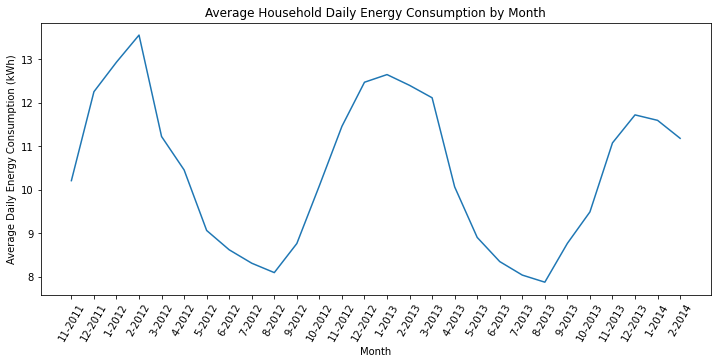

In [10]:
#First, group by each date and find the mean of energy consumption of households that day
d_m_y = df.groupby(['day','month','year']).energy_sum.mean().reset_index()
#Second, group by each month and find the mean of daily energy consumption of households that month
m_y = d_m_y.groupby(['year','month']).energy_sum.mean().reset_index()
#Add label "mm-yyyy" to each month
m_y['mm-yyyy'] = m_y['month'].astype(str) + '-' + m_y['year'].astype(str)
m_y = m_y.rename(columns={'energy_sum': 'avg_daily_energy_sum'})
#Plot graph
plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=m_y['mm-yyyy'], y=m_y['avg_daily_energy_sum'])
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Average Daily Energy Consumption (kWh)')
plt.title('Average Household Daily Energy Consumption by Month')
plt.savefig(path + 'avg_consumption_month.png', facecolor='w', bbox_inches='tight')   
plt.show()

##### Seasons classification from UK Met Office
Spring: Mar-May
Summer: Jun-Aug
Autumn: Sep-Nov
Winter: Dec-Feb
https://www.metoffice.gov.uk/weather/learn-about/met-office-for-schools/other-content/other-resources/our-seasons

### By Acorn group

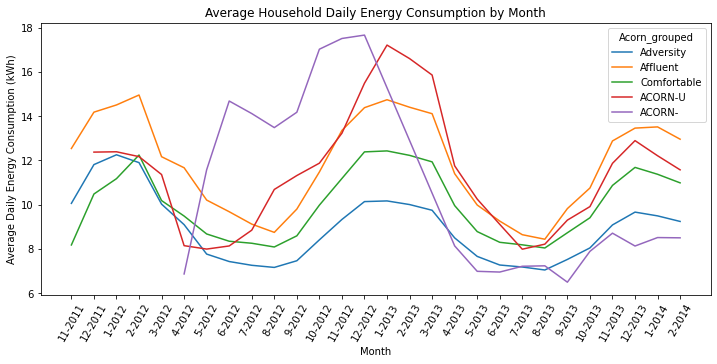

In [11]:
df_acorn = df.groupby(['day','month','year','Acorn_grouped']).energy_sum.mean().reset_index()
df_acorn = df_acorn.groupby(['year','month','Acorn_grouped']).energy_sum.mean().reset_index()
#Add label "mm-yyyy" to each month
df_acorn['mm-yyyy'] = df_acorn['month'].astype(str) + '-' + df_acorn['year'].astype(str)
df_acorn = df_acorn.rename(columns={'energy_sum': 'avg_daily_energy_sum'})
#Plot graph
plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=df_acorn['mm-yyyy'], y=df_acorn['avg_daily_energy_sum'], hue=df_acorn['Acorn_grouped'])
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Average Daily Energy Consumption (kWh)')
plt.title('Average Household Daily Energy Consumption by Month')
plt.show()

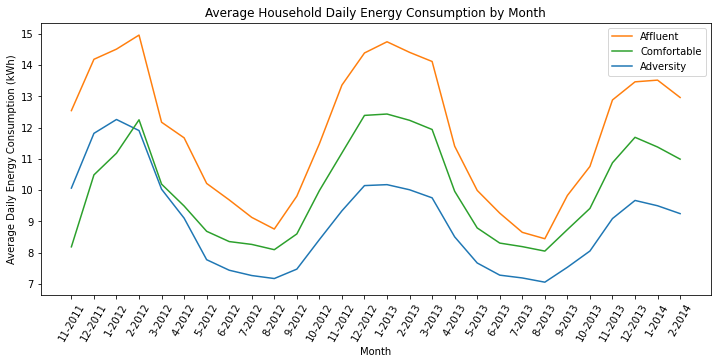

In [12]:
#Dropped "Acorn-" values
df_acorn.drop(df_acorn[(df_acorn['Acorn_grouped'] == 'ACORN-') | (df_acorn['Acorn_grouped'] == 'ACORN-U')].index, inplace=True)
#Plot graph
plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=df_acorn['mm-yyyy'], y=df_acorn['avg_daily_energy_sum'], hue=df_acorn['Acorn_grouped'])
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Average Daily Energy Consumption (kWh)')
plt.title('Average Household Daily Energy Consumption by Month')
#Change order of legend in terms of Acorn hierarchy
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig(path + 'avg_consumption_month_acorn.png', facecolor='w', bbox_inches='tight')   
plt.show()

##### **NOTE** 
The labelling in dataset is slightly different than Acorn User Guide, please note when referencing
Dataset: A-E: Affluent, F-J: Comfortable, K-Q: Adversity, U: ? (Unclassified?)
User guide: A-C: Affluent Achievers, D-E: Rising Prosperity, F-J:Comfortable Communities, K-N: Financially Stretched, O-Q: Urban Adversity

### By Energy Plan

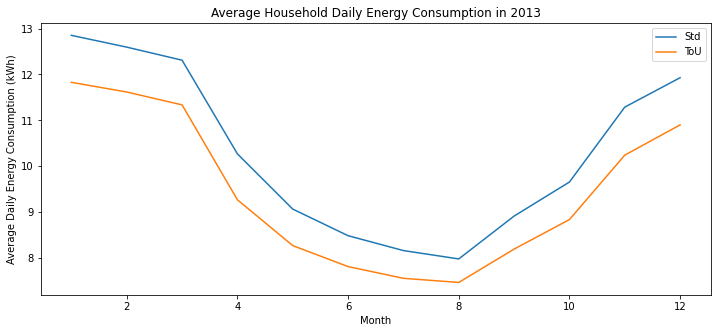

In [13]:
df_stdorTou = df.groupby(['day','month','year','stdorToU']).energy_sum.mean().reset_index()
df_stdorTou = df_stdorTou.groupby(['year','month','stdorToU']).energy_sum.mean().reset_index()
df_stdorTou = df_stdorTou.rename(columns={'energy_sum': 'avg_daily_energy_sum'})
df_stdorTou = df_stdorTou[df_stdorTou['year'] == 2013]
#Plot graph
plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=df_stdorTou['month'], y=df_stdorTou['avg_daily_energy_sum'], hue=df_stdorTou['stdorToU'])
plt.xlabel('Month')
plt.ylabel('Average Daily Energy Consumption (kWh)')
plt.title('Average Household Daily Energy Consumption in 2013')
plt.legend()
plt.savefig(path + './avg_consumption_month_eplan.png', facecolor='w', bbox_inches='tight')   
plt.show()

### Against daily average temperature

In [16]:
#Prepare dataframe subset
#Daily mean temperature is calculated by temperatureMax - temperatureMin
df_temp = df[['day','month','year','temperatureMax','temperatureMin']]
df_temp = df_temp.drop_duplicates()
df_temp['tempMean'] = df['temperatureMax'] - df['temperatureMin']
df_temp = df_temp.groupby(['year','month']).tempMean.mean().reset_index()
#Add label "mm-yyyy" to each month
df_temp['mm-yyyy'] = df_temp['month'].astype(str) + '-' + df_temp['year'].astype(str)

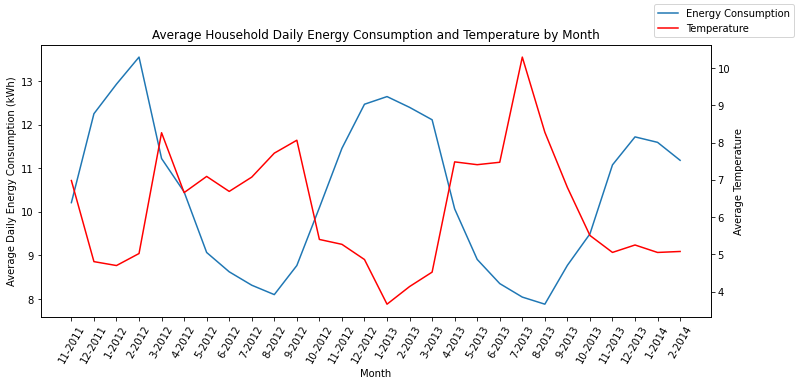

In [17]:
#Reuse the first plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(m_y['mm-yyyy'], m_y['avg_daily_energy_sum'], label='Energy Consumption')
#Create 2nd plot
ax2 = ax.twinx()
ax2.plot(df_temp['mm-yyyy'], df_temp['tempMean'], color='r', label='Temperature')
#Set labels & legends
fig.legend(loc='upper right')
ax.set_xlabel('Month')
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylabel('Average Daily Energy Consumption (kWh)')
ax2.set_ylabel('Average Temperature')
plt.title('Average Household Daily Energy Consumption and Temperature by Month')
plt.savefig(path + 'avg_consumption_vs_temp.png', facecolor='w', bbox_inches='tight')   
plt.show()

In [18]:
#Option 2
df_temp = df[['day','month','year','temperatureMax','temperatureMin']]
df_temp = df_temp.drop_duplicates()
df_temp = df_temp.groupby(['year','month']).agg(meanMaxTemp=('temperatureMax', 'mean'), meanMinTemp=('temperatureMin', 'mean')).reset_index()
#Add label "mm-yyyy" to each month
df_temp['mm-yyyy'] = df_temp['month'].astype(str) + '-' + df_temp['year'].astype(str)

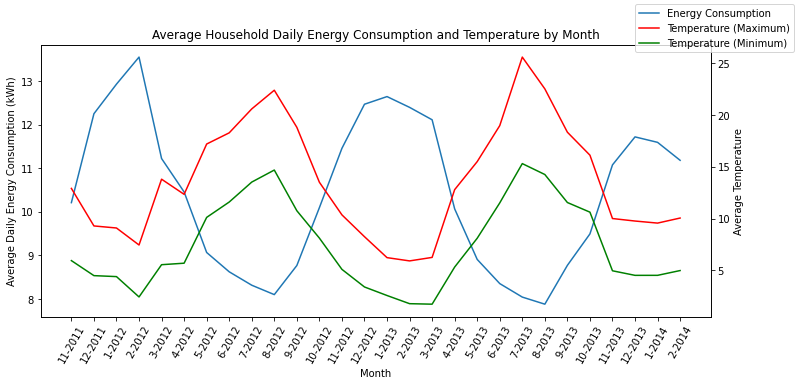

In [19]:
#Reuse the first plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(m_y['mm-yyyy'], m_y['avg_daily_energy_sum'], label='Energy Consumption')
#Create 2nd plot
ax2 = ax.twinx()
ax2.plot(df_temp['mm-yyyy'], df_temp['meanMaxTemp'], color='r', label='Temperature (Maximum)')
ax2.plot(df_temp['mm-yyyy'], df_temp['meanMinTemp'], color='g', label='Temperature (Minimum)')
#Set labels & legends
fig.legend(loc='upper right')
ax.set_xlabel('Month')
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylabel('Average Daily Energy Consumption (kWh)')
ax2.set_ylabel('Average Temperature')
plt.title('Average Household Daily Energy Consumption and Temperature by Month')
plt.savefig(path + 'avg_consumption_vs_temp2.png', facecolor='w', bbox_inches='tight')   
plt.show()

### A for-loop for other weather attributes

#### The following attributes are used:

#### Dew point - the temperature to which air must be cooled to become saturated with water vapor (from Wiki)

#### Wind Speed, Pressure, Pressure, Visibility, Humidity, Cloud Cover, UV Index, Moon Phase

#### Cloud cover - % of how cloudy the day is
https://www.metoffice.gov.uk/public/weather/uk-cloud-cover-forecast/#?tab=map&map=Cloud&zoom=5&lon=-4.00&lat=55.74&fcTime=1635015600

#### Moon Phase - I suspect it's the % illumination of the moon
reference link: https://moonphases.co.uk/moon-calendar

In [21]:
attr_list = ['dewPoint', 'windSpeed', 'pressure', 'visibility', 'humidity', 'cloudCover', 'uvIndex', 'moonPhase']
attr_name = ['Dew Point', 'Wind Speed', 'Pressure', 'Visibility', 'Humidity', 'Cloud Cover', 'UV Index', 'Moon Phase % Illumination']
df[attr_list].describe()

,dewPoint,windSpeed,pressure,visibility,humidity,cloudCover,uvIndex,moonPhase
count,3.458674e+06,3.458674e+06,3.458674e+06,3.458674e+06,3.458674e+06,3.453598e+06,3.453598e+06,3.458674e+06
mean,6.949986e+00,3.593775e+00,1.012972e+03,1.129175e+01,7.796497e-01,4.815126e-01,2.669008e+00,5.030655e-01
std,5.003175e+00,1.693965e+00,1.056487e+01,2.328124e+00,9.712359e-02,1.908792e-01,1.891629e+00,2.867720e-01
min,-7.840000e+00,2.000000e-01,9.792500e+02,1.480000e+00,4.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+00,2.380000e+00,1.006770e+03,1.048000e+01,7.100000e-01,3.500000e-01,1.000000e+00,2.600000e-01
50%,7.040000e+00,3.450000e+00,1.013640e+03,1.199000e+01,7.900000e-01,4.700000e-01,2.000000e+00,5.100000e-01
75%,1.078000e+01,4.570000e+00,1.019890e+03,1.283000e+01,8.600000e-01,6.100000e-01,4.000000e+00,7.500000e-01
max,1.777000e+01,9.960000e+00,1.040920e+03,1.534000e+01,9.800000e-01,1.000000e+00,7.000000e+00,9.900000e-01


#### Not used: Precipitation Type, Sunset Time, Sunrise Time

In [22]:
print(df['precipType'].value_counts())

rain    3388959
snow      69715
Name: precipType, dtype: int64


<Figure size 432x288 with 0 Axes>

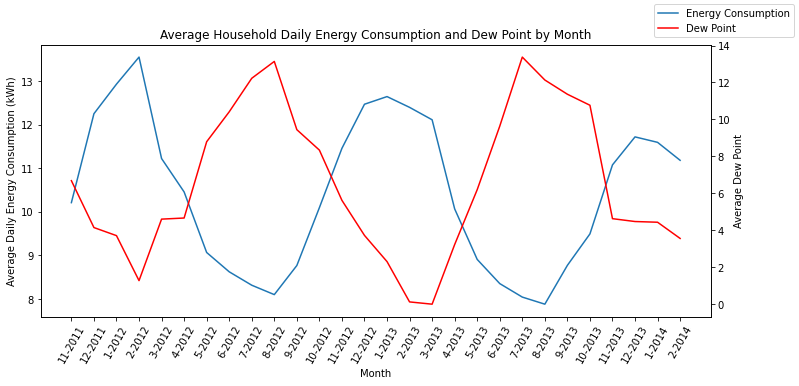

<Figure size 432x288 with 0 Axes>

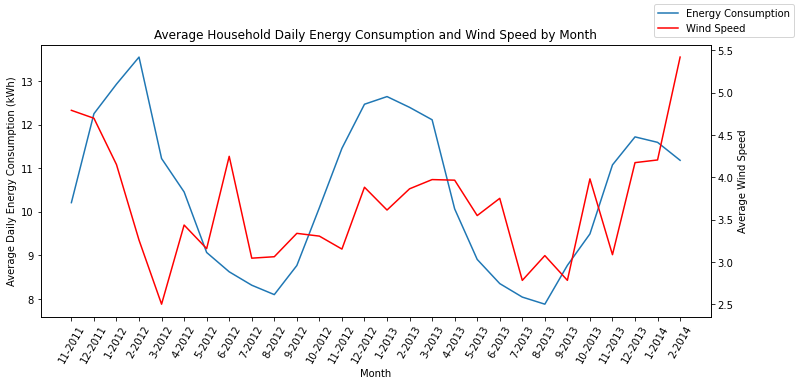

<Figure size 432x288 with 0 Axes>

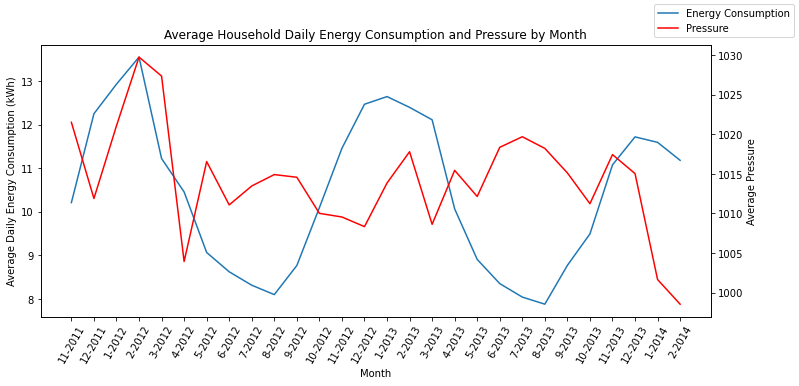

<Figure size 432x288 with 0 Axes>

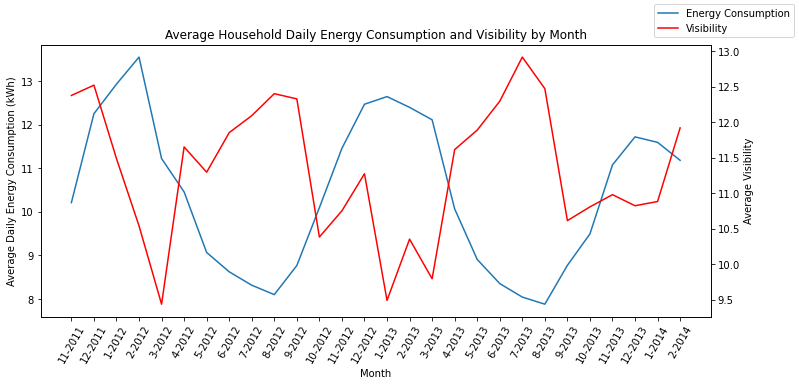

<Figure size 432x288 with 0 Axes>

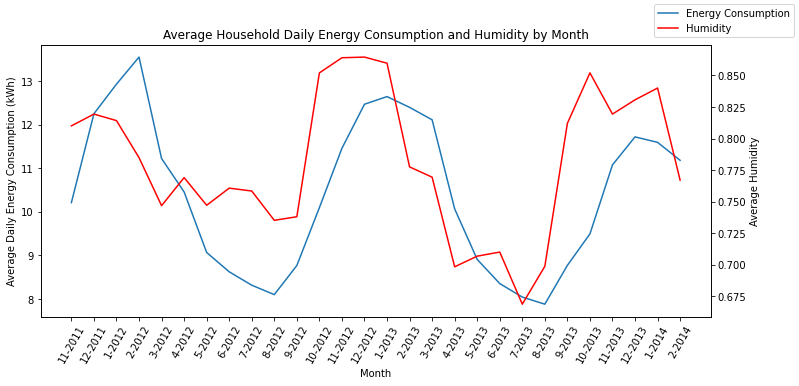

<Figure size 432x288 with 0 Axes>

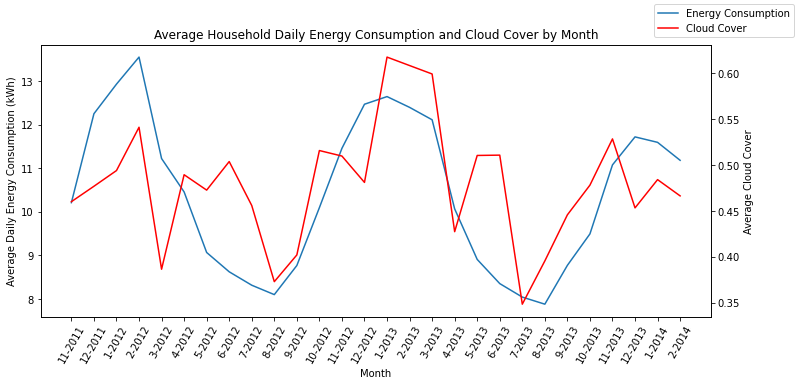

<Figure size 432x288 with 0 Axes>

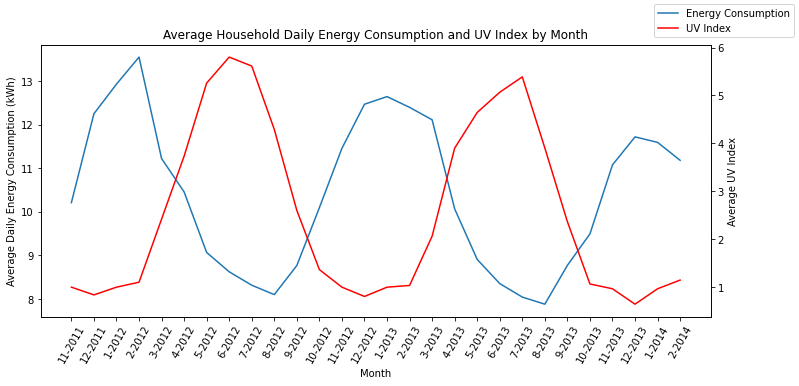

<Figure size 432x288 with 0 Axes>

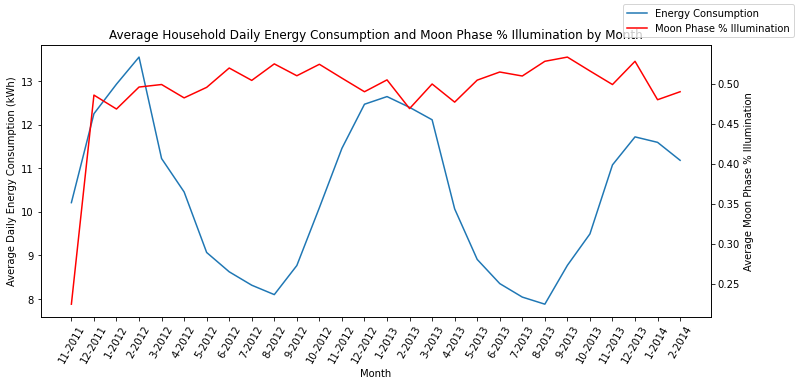

In [23]:
attr_merge = list(zip(attr_list, attr_name))
for attr, name in attr_merge:
    #Prepare dataframe subset
    df_temp = df[['day','month','year',attr]]
    df_temp = df_temp.drop_duplicates()
    df_temp = df_temp.groupby(['year','month'])[attr].mean().reset_index()
    #Add label "mm-yyyy" to each month
    df_temp['mm-yyyy'] = df_temp['month'].astype(str) + '-' + df_temp['year'].astype(str)
    
    #Reuse the first plot
    plt.clf()
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    ax.plot(m_y['mm-yyyy'], m_y['avg_daily_energy_sum'], label='Energy Consumption')
    #Create 2nd plot
    ax2 = ax.twinx()
    ax2.plot(df_temp['mm-yyyy'], df_temp[attr], color='r', label=name)
    #Set labels & legends
    fig.legend(loc='upper right')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', labelrotation=60)
    ax.set_ylabel('Average Daily Energy Consumption (kWh)')
    ax2.set_ylabel('Average ' + name)
    plt.title('Average Household Daily Energy Consumption and ' + name + ' by Month')
    plt.savefig(path + 'avg_consumption_vs_' + name + '.png', facecolor='w', bbox_inches='tight')   
    plt.show()

# Prediction - daily energy consumption

In [74]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import itertools
import time

#### Cloud Cover, UV Index have null values. Will be dropped:

In [75]:
print(df[df['cloudCover'].isna()].date.value_counts())
print(df[df['uvIndex'].isna()].date.value_counts())

2014-01-01    5076
Name: date, dtype: int64
2014-01-01    5076
Name: date, dtype: int64


#### Data cleaning & standardization

In [76]:
df_agg_date = df.groupby('date').mean().sort_values(by='date').reset_index()

In [77]:
df_agg_date = df_agg_date.dropna()  #drop 1 row with NA value
print(df_agg_date.isna().value_counts())

date   energy_median  energy_mean  energy_max  energy_count  energy_std  energy_sum  energy_min  year   month  dateStr  temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  apparentTemperatureMax  uvIndex  temperatureLow  temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  day  
False  False          False        False       False         False       False       False       False  False  False    False           False        False     False       False      False     False                    False       False     False                   False                   False    False           False           False            False                   False      False    824
dtype: int64


In [78]:
df_agg_date

,date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,year,month,dateStr,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,day
0,2011-11-24,0.177500,0.223513,0.757923,48.0,0.150510,10.728615,0.074385,2011.0,11.0,20111124.0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,24.0
1,2011-11-25,0.161040,0.212129,0.766800,48.0,0.161305,10.182200,0.064560,2011.0,11.0,20111125.0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,25.0
2,2011-11-26,0.181578,0.221056,0.749562,48.0,0.153687,10.610687,0.067562,2011.0,11.0,20111126.0,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,26.0
3,2011-11-27,0.181061,0.226058,0.865463,48.0,0.175145,10.850805,0.069927,2011.0,11.0,20111127.0,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,27.0
4,2011-11-28,0.161732,0.210533,0.852049,48.0,0.171324,10.105561,0.061610,2011.0,11.0,20111128.0,12.58,190.0,4.39,0.56,2.34,1022.80,10.27,11.84,0.86,10.27,12.58,1.0,10.27,1.31,10.27,1.31,0.12,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,2014-02-23,0.178070,0.239498,0.929805,48.0,0.198529,11.495899,0.061113,2014.0,2.0,20140223.0,11.94,200.0,6.17,0.66,7.10,1010.37,11.94,12.33,0.76,5.52,11.94,1.0,7.99,8.67,11.94,5.53,0.78,23.0
821,2014-02-24,0.155975,0.217112,0.876215,48.0,0.183907,10.421352,0.057858,2014.0,2.0,20140224.0,14.23,183.0,6.03,0.50,5.02,1005.19,14.23,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82,24.0
822,2014-02-25,0.155168,0.214461,0.870512,48.0,0.181578,10.294125,0.057743,2014.0,2.0,20140225.0,11.43,202.0,5.06,0.62,5.69,1000.65,10.31,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86,25.0
823,2014-02-26,0.152310,0.212842,0.871735,48.0,0.180740,10.216438,0.057401,2014.0,2.0,20140226.0,11.29,227.0,2.74,0.26,3.82,1012.73,11.29,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90,26.0


In [79]:
#Create X and Y

#X(12 attr.)
X_attr= ['temperatureMax', 'windBearing', 'dewPoint', 'windSpeed', 'cloudCover', 'pressure', \
         'visibility', 'humidity', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh']

X = df_agg_date[X_attr]
X = pd.DataFrame(StandardScaler().fit_transform(X))
Y = df_agg_date['energy_sum'].values

#### K-fold & repeated k-fold initialization

In [80]:
#Create repeated 5-fold cross-validation, repeat 3 times
kf_5_repeated = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

#Create 5-fold cross-validation
kf_5 = KFold(n_splits=5)

#### Train-test split

In [81]:
#Method 1
#Split the whole thing to 8:2 as per date order
split = int(len(X) * 0.7)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
Y_train = Y[:split]
Y_test = Y[split:]

print(len(X))
print(len(X_train))
print(len(X_test))

824
576
248


In [82]:
#Method 2
#Create train test split randomly by 8:2 ratio
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#### Set x-axis ticks and labels for result graphs

In [83]:
date_labels = df_agg_date.iloc[split:]['date'].reset_index()
step = 10
xtick_index = list(range(0, len(Y_test)+1, step))
xtick_index = [0] + [x - 1 for x in xtick_index if x != 0]
xtick_index
xtick_labels = date_labels.iloc[xtick_index].date

#### Generate Graph Function

In [84]:
def plot_graph(Y_test, Y_pred, model_name):
    fig= plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    plt.plot(Y_test, color='b', label='Actual')
    plt.plot(Y_pred, color='r', label='Prediction')
    
    #Set labels & legends
    fig.legend(loc='upper right')
    ax.set_xlabel('Date')
    ax.set_xticks(xtick_index)
    ax.set_xticklabels(xtick_labels)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_ylabel('Average Daily Energy Consumption (kWh)')
    plt.title('Average Daily Energy Consumption Prediction by ' + model_name)
    plt.savefig('./models/' + model_name + '.png', facecolor='w', bbox_inches='tight')   
    plt.show()

#### Linear Regression Function

In [85]:
def mse_linear_reg(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    output_mse = mse(y_test, pred)
    return model, pred, output_mse

#### Forward selection

[11] 0.9500165860467704
[11, 8] 0.6987367231967219
[11, 8, 10] 0.649060214090606
[11, 8, 10, 5] 0.6297219894422402
[11, 8, 10, 5, 3] 0.6269623993737439
[11, 8, 10, 5, 3, 7] 0.6217677222964769
[11, 8, 10, 5, 3, 7, 2] 0.6039618343576609
[11, 8, 10, 5, 3, 7, 2, 1] 0.6030422912317747
The sorted indices of selected predictors are: [1, 2, 3, 5, 7, 8, 10, 11]
The selected predictors are: ['windBearing', 'dewPoint', 'windSpeed', 'pressure', 'humidity', 'uvIndex', 'temperatureMin', 'temperatureHigh']
Test MSE:  0.693116877980268
Executed time in seconds: 9.422038793563843


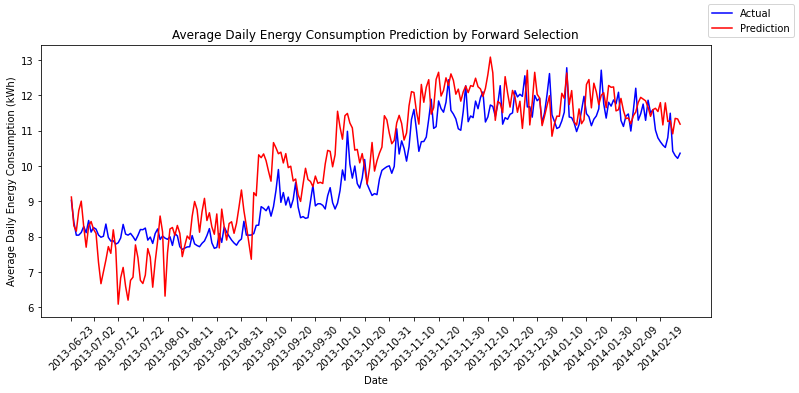

In [86]:
start = time.time()

forward_selected_predictors = []
remaining_predictors = list(range(len(X.columns)))
forward_mse = 10000

while len(remaining_predictors):
    mse_list = []
    
    #Loop through each remaining predictors
    for predictors in remaining_predictors:
        #Get current X based on the predictors
        current_predictors = forward_selected_predictors.copy()
        current_predictors.append(predictors)
        X_current = X_train.iloc[:, current_predictors]
        
        #Create model
        model = LinearRegression()
        
        #Evaluate model and append to MSE list
        score = -1*cross_val_score(model, X_current, Y_train, cv=kf_5_repeated, \
           scoring='neg_mean_squared_error').mean()
        mse_list.append(score)
        
    #Select the remaining predictor which yields the lowest MSE
    mse_min, index = min(mse_list), mse_list.index(min(mse_list))
    
    #Check if need to add that predictor
    if mse_min < forward_mse:
        forward_mse = mse_min
        new_predictor = remaining_predictors.pop(index)
        forward_selected_predictors.append(new_predictor)
        print(forward_selected_predictors, mse_min)
        
    #Break the loop if the score can no longer improve
    elif mse_min >= forward_mse:
        break
        
#Print the intermediate results
forward_selected_predictors.sort()
forward_selected_predictors_names = [X_attr[i] for i in forward_selected_predictors]
print('The sorted indices of selected predictors are:', forward_selected_predictors)
print('The selected predictors are:' , forward_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_forward_train_final = X_train.iloc[:, forward_selected_predictors]
X_forward_test_final = X_test.iloc[:, forward_selected_predictors]
best_forward_model, best_forward_y_pred, best_forward_test_mse = \
    mse_linear_reg(X_forward_train_final, Y_train, X_forward_test_final, Y_test)
print('Test MSE: ', best_forward_test_mse)

#Check time used to run the code
end = time.time()
forward_time = end-start
print('Executed time in seconds:', forward_time)

#Generate graph
plot_graph(Y_test, best_forward_y_pred, 'Forward Selection')

#### Backward selection

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 0.6084535643346534
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11] 0.6058411566886072
[1, 2, 3, 4, 5, 6, 7, 8, 10] 0.6041745670649328
[1, 2, 3, 5, 6, 7, 8, 10] 0.6019536582493551
[1, 2, 3, 5, 7, 8, 10] 0.6009428409742283
[1, 2, 3, 5, 7, 8] 0.6006243625356312
The indices of remaining predictors are: [1, 2, 3, 5, 7, 8]
The remaining predictors are: ['windBearing', 'dewPoint', 'windSpeed', 'pressure', 'humidity', 'uvIndex']
Test MSE:  0.6954065951539614
Executed time: 9.444264888763428


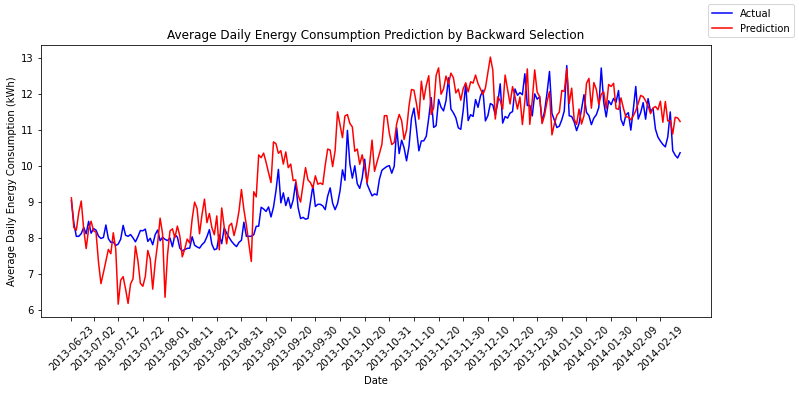

In [87]:
start = time.time()

backward_selected_predictors = list(range(len(X.columns)))
model = LinearRegression()
backward_mse = -1*cross_val_score(model, X, Y, cv=kf_5, \
           scoring='neg_mean_squared_error').mean()

while len(backward_selected_predictors):
    mse_list = []
    
    #Loop through each remaining predictors
    for predictors in backward_selected_predictors:
        #Get current X based on the predictors
        current_predictors = backward_selected_predictors.copy()
        current_predictors.remove(predictors)
        X_current = X_train.iloc[:, current_predictors]
        
        #Create model
        model = LinearRegression()
        
        #Evaluate model and append to MSE list
        score = -1*cross_val_score(model, X_current, Y_train, cv=kf_5_repeated, \
           scoring='neg_mean_squared_error').mean()
        mse_list.append(score)
        
    #Select the remaining predictor which yields the lowest MSE
    mse_min, index = min(mse_list), mse_list.index(min(mse_list))
    
    #Check if need to add that predictor
    if mse_min < backward_mse:
        backward_mse = mse_min
        deleted_predictor = backward_selected_predictors[index]
        backward_selected_predictors.remove(deleted_predictor)
        print(backward_selected_predictors, backward_mse)
        
    #Break the loop if the score can no longer improve
    elif mse_min >= backward_mse:
        break
        
#Print the results
backward_selected_predictors_names = [X_attr[i] for i in backward_selected_predictors]
print('The indices of remaining predictors are:', backward_selected_predictors)
print('The remaining predictors are:' , backward_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_backward_train_final = X_train.iloc[:, backward_selected_predictors]
X_backward_test_final = X_test.iloc[:, backward_selected_predictors]
best_backward_model, best_backward_y_pred, best_backward_test_mse = \
    mse_linear_reg(X_backward_train_final, Y_train, X_backward_test_final, Y_test)
print('Test MSE: ', best_backward_test_mse)

#Check time used to run the code
end = time.time()
backward_time = end-start
print('Executed time:', backward_time)

#Generate graph
plot_graph(Y_test, best_backward_y_pred, 'Backward Selection')

#### Best subset selection

(0,) 0.566281136668855
(1,) 3.050557015775021
(2,) 0.7388037781237353
(3,) 2.8958150328717465
(4,) 2.8302264112652455
(5,) 3.303997858865667
(6,) 2.8366969868658436
(7,) 2.5053237480543427
(8,) 2.403895162931658
(9,) 0.7365404019065035
(10,) 0.578476123066294
(11,) 0.5652974447793535
(0, 1) 0.6528761365704265
(0, 2) 0.552210375019939
(0, 3) 0.5662373827936087
(0, 4) 0.5775843515912867
(0, 5) 0.6209746695440401
(0, 6) 0.5657691607985277
(0, 7) 0.5962600634634333
(0, 8) 0.8554949179354605
(0, 9) 0.5495214066247813
(0, 10) 0.5120413069042471
(0, 11) 0.5619112687516107
(1, 2) 0.800833156115488
(1, 3) 2.900522384932201
(1, 4) 2.8301089788193874
(1, 5) 3.3069387292393158
(1, 6) 2.8270967644145686
(1, 7) 2.526631935886287
(1, 8) 2.347611408898947
(1, 9) 0.77110171897962
(1, 10) 0.6202077133296829
(1, 11) 0.6471233807365572
(2, 3) 0.705893842924923
(2, 4) 0.6841827326310959
(2, 5) 0.7380210811547985
(2, 6) 0.5641647181705534
(2, 7) 0.5465070283215431
(2, 8) 0.9032367557836463
(2, 9) 0.62438059

(7, 9, 10) 0.6121939414267786
(7, 9, 11) 0.5856196874885817
(7, 10, 11) 0.5689779452447548
(8, 9, 10) 0.8063732604097011
(8, 9, 11) 0.8194569718056305
(8, 10, 11) 0.7517395175029523
(9, 10, 11) 0.5186006833442816
(0, 1, 2, 3) 0.6393136245395022
(0, 1, 2, 4) 0.6561914390706803
(0, 1, 2, 5) 0.7216045330790095
(0, 1, 2, 6) 0.641709395119554
(0, 1, 2, 7) 0.6061622877783533
(0, 1, 2, 8) 0.7900517193943941
(0, 1, 2, 9) 0.6326568660184968
(0, 1, 2, 10) 0.6266246977296929
(0, 1, 2, 11) 0.6303791440454201
(0, 1, 3, 4) 0.6533545261123721
(0, 1, 3, 5) 0.7052530644753044
(0, 1, 3, 6) 0.6677735241188334
(0, 1, 3, 7) 0.6695630821343049
(0, 1, 3, 8) 0.8708687088473688
(0, 1, 3, 9) 0.6369919091558857
(0, 1, 3, 10) 0.5880311797050823
(0, 1, 3, 11) 0.6499196769220817
(0, 1, 4, 5) 0.7066218313383243
(0, 1, 4, 6) 0.6745390024631426
(0, 1, 4, 7) 0.6987686793130903
(0, 1, 4, 8) 0.8630807896473587
(0, 1, 4, 9) 0.6457218219497523
(0, 1, 4, 10) 0.5937439136116738
(0, 1, 4, 11) 0.6477998686703307
(0, 1, 5, 6) 0

(1, 5, 6, 11) 0.7162259969977053
(1, 5, 7, 8) 2.3219256105771517
(1, 5, 7, 9) 0.9405205821596032
(1, 5, 7, 10) 0.8051455544164674
(1, 5, 7, 11) 0.7515781588313999
(1, 5, 8, 9) 1.009779083071322
(1, 5, 8, 10) 0.8487659436562549
(1, 5, 8, 11) 0.8303521650064312
(1, 5, 9, 10) 0.6015612073456643
(1, 5, 9, 11) 0.6856811214562015
(1, 5, 10, 11) 0.650606378968322
(1, 6, 7, 8) 2.3394162498020767
(1, 6, 7, 9) 0.7815636905457969
(1, 6, 7, 10) 0.6943094262250682
(1, 6, 7, 11) 0.6681734478688363
(1, 6, 8, 9) 1.0355979265910846
(1, 6, 8, 10) 0.8586841484429234
(1, 6, 8, 11) 0.8894631535304041
(1, 6, 9, 10) 0.559355773900178
(1, 6, 9, 11) 0.6432047267087486
(1, 6, 10, 11) 0.6057013983464119
(1, 7, 8, 9) 1.0118909750743839
(1, 7, 8, 10) 0.8505046786937591
(1, 7, 8, 11) 0.859416968763256
(1, 7, 9, 10) 0.6390936069446376
(1, 7, 9, 11) 0.648412540217581
(1, 7, 10, 11) 0.6262827787367726
(1, 8, 9, 10) 0.8080531356403188
(1, 8, 9, 11) 0.8333112797863785
(1, 8, 10, 11) 0.7667449625715758
(1, 9, 10, 11) 0.6

(0, 1, 2, 6, 7) 0.6056594216736241
(0, 1, 2, 6, 8) 0.7901933269819527
(0, 1, 2, 6, 9) 0.6385766023152979
(0, 1, 2, 6, 10) 0.6273138447705846
(0, 1, 2, 6, 11) 0.6344774540866212
(0, 1, 2, 7, 8) 0.7374284895727682
(0, 1, 2, 7, 9) 0.6067067891751752
(0, 1, 2, 7, 10) 0.6070746486522856
(0, 1, 2, 7, 11) 0.6056742844472647
(0, 1, 2, 8, 9) 0.7925171838390029
(0, 1, 2, 8, 10) 0.7606805010854697
(0, 1, 2, 8, 11) 0.7915194231380192
(0, 1, 2, 9, 10) 0.6247906841841582
(0, 1, 2, 9, 11) 0.6260190514424125
(0, 1, 2, 10, 11) 0.6249966771420911
(0, 1, 3, 4, 5) 0.6921236791660171
(0, 1, 3, 4, 6) 0.674773898099372
(0, 1, 3, 4, 7) 0.6996058274403932
(0, 1, 3, 4, 8) 0.8631173123527823
(0, 1, 3, 4, 9) 0.6450624986561749
(0, 1, 3, 4, 10) 0.5840081953231754
(0, 1, 3, 4, 11) 0.6484026812631457
(0, 1, 3, 5, 6) 0.7170957833471003
(0, 1, 3, 5, 7) 0.7517703095620027
(0, 1, 3, 5, 8) 0.8294491068749311
(0, 1, 3, 5, 9) 0.6893631842098256
(0, 1, 3, 5, 10) 0.634948925733652
(0, 1, 3, 5, 11) 0.6917499729962624
(0, 1, 3

(0, 4, 5, 6, 7) 0.7448967806006748
(0, 4, 5, 6, 8) 0.8126519256367029
(0, 4, 5, 6, 9) 0.6166306959507099
(0, 4, 5, 6, 10) 0.5638970661409551
(0, 4, 5, 6, 11) 0.6048754206299043
(0, 4, 5, 7, 8) 0.8138348190331309
(0, 4, 5, 7, 9) 0.7199859906777321
(0, 4, 5, 7, 10) 0.6769579342428659
(0, 4, 5, 7, 11) 0.7283315545090929
(0, 4, 5, 8, 9) 0.7877569750741868
(0, 4, 5, 8, 10) 0.7256231105065958
(0, 4, 5, 8, 11) 0.8031389460755836
(0, 4, 5, 9, 10) 0.5737947248771716
(0, 4, 5, 9, 11) 0.6032010924391967
(0, 4, 5, 10, 11) 0.5599067049859631
(0, 4, 6, 7, 8) 0.8374430051583227
(0, 4, 6, 7, 9) 0.6334235036248115
(0, 4, 6, 7, 10) 0.5814359025835067
(0, 4, 6, 7, 11) 0.6508307070304261
(0, 4, 6, 8, 9) 0.8328900467689466
(0, 4, 6, 8, 10) 0.7432333611798219
(0, 4, 6, 8, 11) 0.8591887733716197
(0, 4, 6, 9, 10) 0.516240093143797
(0, 4, 6, 9, 11) 0.5707487036185933
(0, 4, 6, 10, 11) 0.5078023910432534
(0, 4, 7, 8, 9) 0.8234530902734024
(0, 4, 7, 8, 10) 0.7403172776063968
(0, 4, 7, 8, 11) 0.8435209083059517
(

(1, 4, 7, 9, 11) 0.6769968168203745
(1, 4, 7, 10, 11) 0.628535201672758
(1, 4, 8, 9, 10) 0.7696544402518751
(1, 4, 8, 9, 11) 0.8393408894445026
(1, 4, 8, 10, 11) 0.7586045812055873
(1, 4, 9, 10, 11) 0.59571108409153
(1, 5, 6, 7, 8) 2.322088892676886
(1, 5, 6, 7, 9) 0.9520235431946096
(1, 5, 6, 7, 10) 0.823604515227578
(1, 5, 6, 7, 11) 0.7514301907174561
(1, 5, 6, 8, 9) 1.0171100855610482
(1, 5, 6, 8, 10) 0.856402528665613
(1, 5, 6, 8, 11) 0.8434606596962041
(1, 5, 6, 9, 10) 0.5927657773190339
(1, 5, 6, 9, 11) 0.7003391933447374
(1, 5, 6, 10, 11) 0.66307757643337
(1, 5, 7, 8, 9) 0.9916030320260367
(1, 5, 7, 8, 10) 0.854882710289606
(1, 5, 7, 8, 11) 0.8255742621659062
(1, 5, 7, 9, 10) 0.7567864886590534
(1, 5, 7, 9, 11) 0.7402058688842468
(1, 5, 7, 10, 11) 0.7170739291883605
(1, 5, 8, 9, 10) 0.8009863019792475
(1, 5, 8, 9, 11) 0.7978710204919878
(1, 5, 8, 10, 11) 0.7500883974818529
(1, 5, 9, 10, 11) 0.6566709561581211
(1, 6, 7, 8, 9) 1.0192668111076733
(1, 6, 7, 8, 10) 0.8532297006315295

(4, 6, 7, 8, 11) 0.8446230098001256
(4, 6, 7, 9, 10) 0.596790105270957
(4, 6, 7, 9, 11) 0.6357992549071604
(4, 6, 7, 10, 11) 0.5852362595859927
(4, 6, 8, 9, 10) 0.753181082868695
(4, 6, 8, 9, 11) 0.8361462497834798
(4, 6, 8, 10, 11) 0.7468048456956397
(4, 6, 9, 10, 11) 0.516270692640059
(4, 7, 8, 9, 10) 0.753460900676895
(4, 7, 8, 9, 11) 0.8271501386913387
(4, 7, 8, 10, 11) 0.7441183532841494
(4, 7, 9, 10, 11) 0.5768919872307773
(4, 8, 9, 10, 11) 0.7402720887252356
(5, 6, 7, 8, 9) 0.9960095281496079
(5, 6, 7, 8, 10) 0.8525952722120855
(5, 6, 7, 8, 11) 0.8037945281335241
(5, 6, 7, 9, 10) 0.7656980436392731
(5, 6, 7, 9, 11) 0.692241907632185
(5, 6, 7, 10, 11) 0.6783155934836568
(5, 6, 8, 9, 10) 0.7976749982099405
(5, 6, 8, 9, 11) 0.7818652546163064
(5, 6, 8, 10, 11) 0.7336286653136986
(5, 6, 9, 10, 11) 0.5627085059111694
(5, 7, 8, 9, 10) 0.7976528922831073
(5, 7, 8, 9, 11) 0.782149239881858
(5, 7, 8, 10, 11) 0.7412829074226246
(5, 7, 9, 10, 11) 0.6553851196184265
(5, 8, 9, 10, 11) 0.7319

(0, 1, 5, 7, 9, 10) 0.7194625016313778
(0, 1, 5, 7, 9, 11) 0.7404019517462319
(0, 1, 5, 7, 10, 11) 0.7171162516089832
(0, 1, 5, 8, 9, 10) 0.7553776475422146
(0, 1, 5, 8, 9, 11) 0.8018043769354554
(0, 1, 5, 8, 10, 11) 0.7514674102629438
(0, 1, 5, 9, 10, 11) 0.6579449889586023
(0, 1, 6, 7, 8, 9) 0.8449536221753303
(0, 1, 6, 7, 8, 10) 0.7734571747997853
(0, 1, 6, 7, 8, 11) 0.8655294230785133
(0, 1, 6, 7, 9, 10) 0.6227612906004141
(0, 1, 6, 7, 9, 11) 0.649987856424657
(0, 1, 6, 7, 10, 11) 0.6245769723731922
(0, 1, 6, 8, 9, 10) 0.775227168599558
(0, 1, 6, 8, 9, 11) 0.8425343515632435
(0, 1, 6, 8, 10, 11) 0.77409844485807
(0, 1, 6, 9, 10, 11) 0.6106848361312625
(0, 1, 7, 8, 9, 10) 0.7665283910561875
(0, 1, 7, 8, 9, 11) 0.8302448998979598
(0, 1, 7, 8, 10, 11) 0.7656866098016881
(0, 1, 7, 9, 10, 11) 0.6214726840259183
(0, 1, 8, 9, 10, 11) 0.7675908991664842
(0, 2, 3, 4, 5, 6) 0.658185434642738
(0, 2, 3, 4, 5, 7) 0.6164617847834566
(0, 2, 3, 4, 5, 8) 0.753547731440015
(0, 2, 3, 4, 5, 9) 0.66595

(0, 3, 7, 8, 9, 11) 0.8132183793706013
(0, 3, 7, 8, 10, 11) 0.7471709062133689
(0, 3, 7, 9, 10, 11) 0.5562772118750652
(0, 3, 8, 9, 10, 11) 0.7466132685380255
(0, 4, 5, 6, 7, 8) 0.8111037500662145
(0, 4, 5, 6, 7, 9) 0.728470874658616
(0, 4, 5, 6, 7, 10) 0.6913019041233945
(0, 4, 5, 6, 7, 11) 0.733947683215648
(0, 4, 5, 6, 8, 9) 0.794427612534689
(0, 4, 5, 6, 8, 10) 0.7298528782288698
(0, 4, 5, 6, 8, 11) 0.8095561597715941
(0, 4, 5, 6, 9, 10) 0.572964860177066
(0, 4, 5, 6, 9, 11) 0.6037322816784919
(0, 4, 5, 6, 10, 11) 0.5588706106501604
(0, 4, 5, 7, 8, 9) 0.7952127756351114
(0, 4, 5, 7, 8, 10) 0.7370039139447104
(0, 4, 5, 7, 8, 11) 0.8110529009959742
(0, 4, 5, 7, 9, 10) 0.6722264714666157
(0, 4, 5, 7, 9, 11) 0.7120036028342772
(0, 4, 5, 7, 10, 11) 0.6744733277713721
(0, 4, 5, 8, 9, 10) 0.7263837141874812
(0, 4, 5, 8, 9, 11) 0.784800560601181
(0, 4, 5, 8, 10, 11) 0.7253066728576091
(0, 4, 5, 9, 10, 11) 0.5665910488746126
(0, 4, 6, 7, 8, 9) 0.825337042892855
(0, 4, 6, 7, 8, 10) 0.7412444

(1, 3, 5, 7, 8, 11) 0.8232955969737971
(1, 3, 5, 7, 9, 10) 0.6820092833739694
(1, 3, 5, 7, 9, 11) 0.7145649799551402
(1, 3, 5, 7, 10, 11) 0.6794726368077496
(1, 3, 5, 8, 9, 10) 0.7646349928374033
(1, 3, 5, 8, 9, 11) 0.790158185686988
(1, 3, 5, 8, 10, 11) 0.7319776757460515
(1, 3, 5, 9, 10, 11) 0.633275900816723
(1, 3, 6, 7, 8, 9) 1.0106116656227775
(1, 3, 6, 7, 8, 10) 0.8283968558776739
(1, 3, 6, 7, 8, 11) 0.8687262982949723
(1, 3, 6, 7, 9, 10) 0.6054660115566349
(1, 3, 6, 7, 9, 11) 0.647261965887918
(1, 3, 6, 7, 10, 11) 0.6128136160280228
(1, 3, 6, 8, 9, 10) 0.7957433183816575
(1, 3, 6, 8, 9, 11) 0.8441608711530256
(1, 3, 6, 8, 10, 11) 0.7725563959020435
(1, 3, 6, 9, 10, 11) 0.595172863478692
(1, 3, 7, 8, 9, 10) 0.780059816154794
(1, 3, 7, 8, 9, 11) 0.8317077977068904
(1, 3, 7, 8, 10, 11) 0.7641871253507337
(1, 3, 7, 9, 10, 11) 0.6085680497054161
(1, 3, 8, 9, 10, 11) 0.7632443428569838
(1, 4, 5, 6, 7, 8) 2.287695816440217
(1, 4, 5, 6, 7, 9) 0.9490540476043416
(1, 4, 5, 6, 7, 10) 0.805

(3, 4, 7, 8, 10, 11) 0.7422408426206725
(3, 4, 7, 9, 10, 11) 0.5724972561258141
(3, 4, 8, 9, 10, 11) 0.7357199330119368
(3, 5, 6, 7, 8, 9) 0.9505154996531574
(3, 5, 6, 7, 8, 10) 0.7948470565941919
(3, 5, 6, 7, 8, 11) 0.7998781922681958
(3, 5, 6, 7, 9, 10) 0.6724318694507426
(3, 5, 6, 7, 9, 11) 0.6649552586623204
(3, 5, 6, 7, 10, 11) 0.6389152408156321
(3, 5, 6, 8, 9, 10) 0.7524705637992956
(3, 5, 6, 8, 9, 11) 0.771429221990285
(3, 5, 6, 8, 10, 11) 0.7125521603149397
(3, 5, 6, 9, 10, 11) 0.5260453267307177
(3, 5, 7, 8, 9, 10) 0.7466754907255994
(3, 5, 7, 8, 9, 11) 0.7741972555156443
(3, 5, 7, 8, 10, 11) 0.7231280503720408
(3, 5, 7, 9, 10, 11) 0.6249486065356491
(3, 5, 8, 9, 10, 11) 0.7150363219720083
(3, 6, 7, 8, 9, 10) 0.7795352095415501
(3, 6, 7, 8, 9, 11) 0.8160119347019117
(3, 6, 7, 8, 10, 11) 0.7496068210206427
(3, 6, 7, 9, 10, 11) 0.5598978112124547
(3, 6, 8, 9, 10, 11) 0.7489846444367454
(3, 7, 8, 9, 10, 11) 0.7498379398559785
(4, 5, 6, 7, 8, 9) 0.97692293045888
(4, 5, 6, 7, 8, 1

(0, 1, 3, 5, 6, 7, 9) 0.7232987320661367
(0, 1, 3, 5, 6, 7, 10) 0.6822291123038321
(0, 1, 3, 5, 6, 7, 11) 0.7368428901229328
(0, 1, 3, 5, 6, 8, 9) 0.8051443186619679
(0, 1, 3, 5, 6, 8, 10) 0.7421741939105267
(0, 1, 3, 5, 6, 8, 11) 0.8426675066754779
(0, 1, 3, 5, 6, 9, 10) 0.6413477676304081
(0, 1, 3, 5, 6, 9, 11) 0.6804755048307701
(0, 1, 3, 5, 6, 10, 11) 0.6284484738836047
(0, 1, 3, 5, 7, 8, 9) 0.7964074121045921
(0, 1, 3, 5, 7, 8, 10) 0.7382131435549579
(0, 1, 3, 5, 7, 8, 11) 0.8256232964669625
(0, 1, 3, 5, 7, 9, 10) 0.6754259786668823
(0, 1, 3, 5, 7, 9, 11) 0.7152257603362425
(0, 1, 3, 5, 7, 10, 11) 0.680342584039866
(0, 1, 3, 5, 8, 9, 10) 0.7360521370242677
(0, 1, 3, 5, 8, 9, 11) 0.7937649434351027
(0, 1, 3, 5, 8, 10, 11) 0.7334777225287674
(0, 1, 3, 5, 9, 10, 11) 0.6349559612115565
(0, 1, 3, 6, 7, 8, 9) 0.8455707563145204
(0, 1, 3, 6, 7, 8, 10) 0.7693298240071139
(0, 1, 3, 6, 7, 8, 11) 0.8677436068783476
(0, 1, 3, 6, 7, 9, 10) 0.6067366112568591
(0, 1, 3, 6, 7, 9, 11) 0.6458955434

(0, 3, 4, 5, 6, 9, 11) 0.5820689718530068
(0, 3, 4, 5, 6, 10, 11) 0.5244202694809739
(0, 3, 4, 5, 7, 8, 9) 0.787288757263448
(0, 3, 4, 5, 7, 8, 10) 0.721114328521114
(0, 3, 4, 5, 7, 8, 11) 0.8094190011058763
(0, 3, 4, 5, 7, 9, 10) 0.6449062711776451
(0, 3, 4, 5, 7, 9, 11) 0.6980063906533696
(0, 3, 4, 5, 7, 10, 11) 0.6515261236240208
(0, 3, 4, 5, 8, 9, 10) 0.7083749277215167
(0, 3, 4, 5, 8, 9, 11) 0.7772092898996281
(0, 3, 4, 5, 8, 10, 11) 0.7084127301096637
(0, 3, 4, 5, 9, 10, 11) 0.5436144018055454
(0, 3, 4, 6, 7, 8, 9) 0.8299675513696879
(0, 3, 4, 6, 7, 8, 10) 0.7405228240917969
(0, 3, 4, 6, 7, 8, 11) 0.8446108495000128
(0, 3, 4, 6, 7, 9, 10) 0.5690045974160484
(0, 3, 4, 6, 7, 9, 11) 0.6352401301063079
(0, 3, 4, 6, 7, 10, 11) 0.5756074413579182
(0, 3, 4, 6, 8, 9, 10) 0.7412948798239821
(0, 3, 4, 6, 8, 9, 11) 0.8385720651685913
(0, 3, 4, 6, 8, 10, 11) 0.741460268731103
(0, 3, 4, 6, 9, 10, 11) 0.5034832079695959
(0, 3, 4, 7, 8, 9, 10) 0.7364654447927043
(0, 3, 4, 7, 8, 9, 11) 0.8244883

(1, 3, 4, 5, 6, 7, 10) 0.7179412594444464
(1, 3, 4, 5, 6, 7, 11) 0.7508901235605463
(1, 3, 4, 5, 6, 8, 9) 0.9677589748402744
(1, 3, 4, 5, 6, 8, 10) 0.7768082335913843
(1, 3, 4, 5, 6, 8, 11) 0.8285860625743244
(1, 3, 4, 5, 6, 9, 10) 0.6268911418255336
(1, 3, 4, 5, 6, 9, 11) 0.6783723000498298
(1, 3, 4, 5, 6, 10, 11) 0.6270135205126689
(1, 3, 4, 5, 7, 8, 9) 0.9404714307442713
(1, 3, 4, 5, 7, 8, 10) 0.7723539463079124
(1, 3, 4, 5, 7, 8, 11) 0.8208379265730792
(1, 3, 4, 5, 7, 9, 10) 0.6769814642438099
(1, 3, 4, 5, 7, 9, 11) 0.7300180690063778
(1, 3, 4, 5, 7, 10, 11) 0.6867437650444195
(1, 3, 4, 5, 8, 9, 10) 0.7411680468769919
(1, 3, 4, 5, 8, 9, 11) 0.7905187037378684
(1, 3, 4, 5, 8, 10, 11) 0.7282976370865087
(1, 3, 4, 5, 9, 10, 11) 0.6320173569471179
(1, 3, 4, 6, 7, 8, 9) 0.9975031400683323
(1, 3, 4, 6, 7, 8, 10) 0.7902208794355777
(1, 3, 4, 6, 7, 8, 11) 0.8712170781105207
(1, 3, 4, 6, 7, 9, 10) 0.5923486258731675
(1, 3, 4, 6, 7, 9, 11) 0.6799851562274026
(1, 3, 4, 6, 7, 10, 11) 0.6191339

(0, 1, 2, 3, 4, 6, 9, 10) 0.6175320193224892
(0, 1, 2, 3, 4, 6, 9, 11) 0.6494650864045111
(0, 1, 2, 3, 4, 6, 10, 11) 0.6189855365114428
(0, 1, 2, 3, 4, 7, 8, 9) 0.7173912070008769
(0, 1, 2, 3, 4, 7, 8, 10) 0.7119636008548345
(0, 1, 2, 3, 4, 7, 8, 11) 0.7114663233527626
(0, 1, 2, 3, 4, 7, 9, 10) 0.583747405787356
(0, 1, 2, 3, 4, 7, 9, 11) 0.5833248374531197
(0, 1, 2, 3, 4, 7, 10, 11) 0.584514231663169
(0, 1, 2, 3, 4, 8, 9, 10) 0.7477631715382084
(0, 1, 2, 3, 4, 8, 9, 11) 0.7904871525825778
(0, 1, 2, 3, 4, 8, 10, 11) 0.7465266850218577
(0, 1, 2, 3, 4, 9, 10, 11) 0.613669440503426
(0, 1, 2, 3, 5, 6, 7, 8) 0.7010378419978763
(0, 1, 2, 3, 5, 6, 7, 9) 0.6427148135099552
(0, 1, 2, 3, 5, 6, 7, 10) 0.6455773973980649
(0, 1, 2, 3, 5, 6, 7, 11) 0.6449116395607079
(0, 1, 2, 3, 5, 6, 8, 9) 0.7724276448218207
(0, 1, 2, 3, 5, 6, 8, 10) 0.7411294947150788
(0, 1, 2, 3, 5, 6, 8, 11) 0.7719178129781049
(0, 1, 2, 3, 5, 6, 9, 10) 0.6795788575351552
(0, 1, 2, 3, 5, 6, 9, 11) 0.6797558005688613
(0, 1, 2, 3, 

(0, 2, 3, 4, 5, 7, 9, 10) 0.6120086058623325
(0, 2, 3, 4, 5, 7, 9, 11) 0.6104292918702335
(0, 2, 3, 4, 5, 7, 10, 11) 0.6154535399921868
(0, 2, 3, 4, 5, 8, 9, 10) 0.7142168268263656
(0, 2, 3, 4, 5, 8, 9, 11) 0.7505864830258159
(0, 2, 3, 4, 5, 8, 10, 11) 0.7168898376995781
(0, 2, 3, 4, 5, 9, 10, 11) 0.6451382863714208
(0, 2, 3, 4, 6, 7, 8, 9) 0.7062649768136999
(0, 2, 3, 4, 6, 7, 8, 10) 0.7005137578837419
(0, 2, 3, 4, 6, 7, 8, 11) 0.6997124306554846
(0, 2, 3, 4, 6, 7, 9, 10) 0.5455578475252135
(0, 2, 3, 4, 6, 7, 9, 11) 0.5453965465553053
(0, 2, 3, 4, 6, 7, 10, 11) 0.5484713034888378
(0, 2, 3, 4, 6, 8, 9, 10) 0.733897389242528
(0, 2, 3, 4, 6, 8, 9, 11) 0.7692971261684898
(0, 2, 3, 4, 6, 8, 10, 11) 0.7306308766235493
(0, 2, 3, 4, 6, 9, 10, 11) 0.5663905750701727
(0, 2, 3, 4, 7, 8, 9, 10) 0.7022326583200995
(0, 2, 3, 4, 7, 8, 9, 11) 0.7015181808362322
(0, 2, 3, 4, 7, 8, 10, 11) 0.6961243663070972
(0, 2, 3, 4, 7, 9, 10, 11) 0.5453431023835499
(0, 2, 3, 4, 8, 9, 10, 11) 0.7316758511793725
(0,

(1, 3, 4, 5, 6, 7, 9, 10) 0.6814659522738546
(1, 3, 4, 5, 6, 7, 9, 11) 0.7283234582066276
(1, 3, 4, 5, 6, 7, 10, 11) 0.6850499253038429
(1, 3, 4, 5, 6, 8, 9, 10) 0.7435406657042078
(1, 3, 4, 5, 6, 8, 9, 11) 0.8045338317613376
(1, 3, 4, 5, 6, 8, 10, 11) 0.7387454863576066
(1, 3, 4, 5, 6, 9, 10, 11) 0.6321885847433427
(1, 3, 4, 5, 7, 8, 9, 10) 0.7334361725365032
(1, 3, 4, 5, 7, 8, 9, 11) 0.7952637956697546
(1, 3, 4, 5, 7, 8, 10, 11) 0.735937770712522
(1, 3, 4, 5, 7, 9, 10, 11) 0.6777980356498157
(1, 3, 4, 5, 8, 9, 10, 11) 0.7268506232103327
(1, 3, 4, 6, 7, 8, 9, 10) 0.7583120937815546
(1, 3, 4, 6, 7, 8, 9, 11) 0.8546618320768631
(1, 3, 4, 6, 7, 8, 10, 11) 0.7659710940779063
(1, 3, 4, 6, 7, 9, 10, 11) 0.6132836020973813
(1, 3, 4, 6, 8, 9, 10, 11) 0.7644046957107802
(1, 3, 4, 7, 8, 9, 10, 11) 0.7516928660477159
(1, 3, 5, 6, 7, 8, 9, 10) 0.7510746247961189
(1, 3, 5, 6, 7, 8, 9, 11) 0.7997783326299623
(1, 3, 5, 6, 7, 8, 10, 11) 0.7417543008898325
(1, 3, 5, 6, 7, 9, 10, 11) 0.6709079742006484

(0, 1, 3, 5, 7, 8, 9, 10, 11) 0.734633967539
(0, 1, 3, 6, 7, 8, 9, 10, 11) 0.7747812736824509
(0, 1, 4, 5, 6, 7, 8, 9, 10) 0.7600141730183003
(0, 1, 4, 5, 6, 7, 8, 9, 11) 0.8181111900938843
(0, 1, 4, 5, 6, 7, 8, 10, 11) 0.7606536524225023
(0, 1, 4, 5, 6, 7, 9, 10, 11) 0.7184722968624043
(0, 1, 4, 5, 6, 8, 9, 10, 11) 0.7599435043066762
(0, 1, 4, 5, 7, 8, 9, 10, 11) 0.7537979998793266
(0, 1, 4, 6, 7, 8, 9, 10, 11) 0.7704810031743655
(0, 1, 5, 6, 7, 8, 9, 10, 11) 0.7644418590664334
(0, 2, 3, 4, 5, 6, 7, 8, 9) 0.6766871649564423
(0, 2, 3, 4, 5, 6, 7, 8, 10) 0.6739391191831099
(0, 2, 3, 4, 5, 6, 7, 8, 11) 0.6767960460848115
(0, 2, 3, 4, 5, 6, 7, 9, 10) 0.6182421479330594
(0, 2, 3, 4, 5, 6, 7, 9, 11) 0.6177868674643927
(0, 2, 3, 4, 5, 6, 7, 10, 11) 0.6219460421972449
(0, 2, 3, 4, 5, 6, 8, 9, 10) 0.7130278623317091
(0, 2, 3, 4, 5, 6, 8, 9, 11) 0.7453550600555721
(0, 2, 3, 4, 5, 6, 8, 10, 11) 0.7141108822216127
(0, 2, 3, 4, 5, 6, 9, 10, 11) 0.6400436130136277
(0, 2, 3, 4, 5, 7, 8, 9, 10) 0.674

(1, 2, 3, 4, 5, 6, 8, 9, 10, 11) 0.7359161444429589
(1, 2, 3, 4, 5, 7, 8, 9, 10, 11) 0.6900996628673847
(1, 2, 3, 4, 6, 7, 8, 9, 10, 11) 0.7244506239990953
(1, 2, 3, 5, 6, 7, 8, 9, 10, 11) 0.699289329339213
(1, 2, 4, 5, 6, 7, 8, 9, 10, 11) 0.7282644981336075
(1, 3, 4, 5, 6, 7, 8, 9, 10, 11) 0.7353523998961291
(2, 3, 4, 5, 6, 7, 8, 9, 10, 11) 0.6736136554023805
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10) 0.6963525242206287
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11) 0.7006321711107281
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11) 0.6952817045864623
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11) 0.6458366698997134
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11) 0.7419456804060982
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11) 0.6931504687158836
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11) 0.730235639059972
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11) 0.7036171974303203
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11) 0.7301377933685257
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11) 0.7403694545864508
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) 0.6763087812896975
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

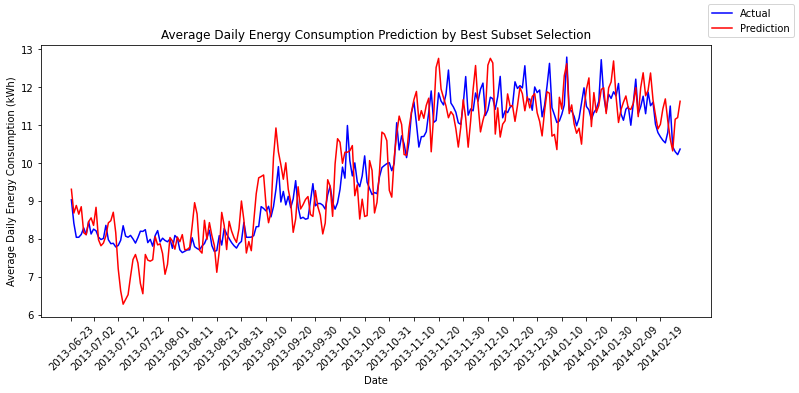

In [88]:
start = time.time()

mse_list = []
predictors_list = []

#Iterate from k = 1 to number of attributes in X
for k in range(1, len(X.columns)+1):
    
    #Iterate all the combinations of picking k predictors from X
    for predictors in itertools.combinations(range(len(X.columns)), k):
        X_train_current = X_train.iloc[:, list(predictors)]
        X_test_current = X_test.iloc[:, list(predictors)]
        
        #Create model
        _, _, output_mse = mse_linear_reg(X_train_current, Y_train, X_test_current, Y_test)
        mse_list.append(output_mse)
        predictors_list.append(predictors)
        print(predictors, output_mse)

#Print the results
subset_mse_min = min(mse_list)
subset_selected_predictors = list(predictors_list[mse_list.index(subset_mse_min)])
subset_selected_predictors_names = [X_attr[i] for i in subset_selected_predictors]
print('The indices of remaining predictors are:', subset_selected_predictors)
print('The remaining predictors are:' , subset_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_subset_train_final = X_train.iloc[:, subset_selected_predictors]
X_subset_test_final = X_test.iloc[:, subset_selected_predictors]
best_subset_model, best_subset_y_pred, best_subset_test_mse = \
    mse_linear_reg(X_subset_train_final, Y_train, X_subset_test_final, Y_test)
print('Test MSE: ', best_subset_test_mse)

#Check time used to run the code
end = time.time()
best_subset_time = end-start
print('Executed time:', best_subset_time)

#Generate graph
plot_graph(Y_test, best_subset_y_pred, 'Best Subset Selection')

#### Lasso Regression

Best alpha: 0.01
Coefficients: [-0.16164112  0.06158703 -0.98864454  0.12376802  0.01385862  0.1807052
 -0.04413238  0.45321162 -0.6472009  -0.         -0.00734294 -0.        ]
Test MSE: 0.6942058489451812
Executed time: 1.0392062664031982


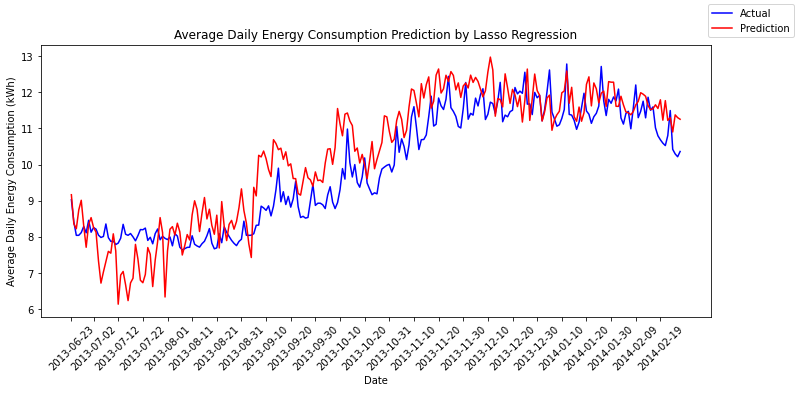

In [89]:
start = time.time()

#LASSO with lambda chosen by cross-validation (default 5-fold cross-validation)
alpha_list = np.linspace(0.01, 50, 1000)
lasso_model = LassoCV(alphas=alpha_list, random_state=1)
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mse(Y_test, lasso_pred)
print('Best alpha:', lasso_model.alpha_)
print('Coefficients:', lasso_model.coef_)
print('Test MSE:', lasso_mse)

#Check time used to run the code
end = time.time()
lasso_time = end-start
print('Executed time:', lasso_time)

#Generate graph
plot_graph(Y_test, lasso_pred, 'Lasso Regression')

#### Ridge regression

Best alpha: 0.8606806806806807
MSE: 0.7001433205636539
Executed time: 0.22358179092407227


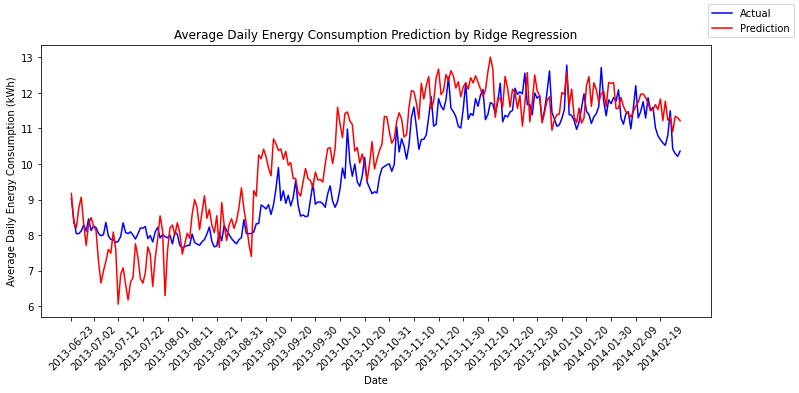

In [90]:
start = time.time()

#Ridge train_test version
alpha_list = np.linspace(0.01, 50, 1000)
ridge_model = RidgeCV(alphas=alpha_list)
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mse(Y_test, ridge_pred)
print('Best alpha:', ridge_model.alpha_)
print('MSE:', ridge_mse)

#Check time used to run the code
end = time.time()
ridge_time = end-start
print('Executed time:', ridge_time)

#Generate graph
plot_graph(Y_test, ridge_pred, 'Ridge Regression')

### KNN Regression

In [91]:
def knn_regression(x_train, y_train, x_test, y_test, k):
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    output_mse = mse(y_test, pred)
    return model, pred, output_mse

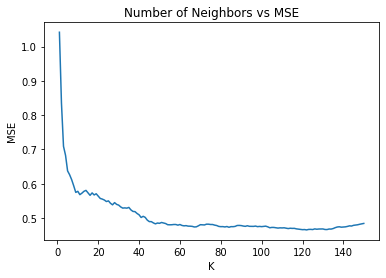

Best K: 121
Test MSE: 0.466512891393392
Executed time: 2.5923867225646973


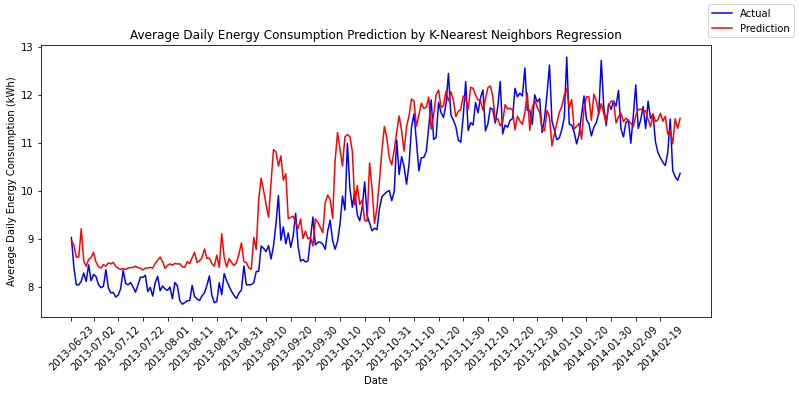

In [92]:
start = time.time()

#Try K from 1 to 150
mse_list = []
k_range = range(1,151)
for K in k_range:
    _, _, model_mse = knn_regression(X_train, Y_train, X_test, Y_test, K)
    mse_list.append(model_mse)
plt.plot(k_range, mse_list)
plt.title("Number of Neighbors vs MSE")
plt.xlabel("K")
plt.ylabel("MSE")
plt.savefig('./models/k_vs_mse.png', facecolor='w', bbox_inches='tight') 
plt.show()

#Pick best K value and fit into model
best_k = mse_list.index(min(mse_list))
best_knn_model, best_knn_y_pred, best_knn_mse = knn_regression(X_train, Y_train, X_test, Y_test, best_k)

#Print results
print('Best K:', best_k)
print('Test MSE:', best_knn_mse)

#Check time used to run the code
end = time.time()
knn_time = end-start
print('Executed time:', knn_time)

#Plot graph
plot_graph(Y_test, best_knn_y_pred, 'K-Nearest Neighbors Regression')

#### Conclusion

In [93]:
model_data = {'Forward Selection':  [forward_selected_predictors, forward_selected_predictors_names, 'N/A', best_forward_test_mse, forward_time],
        'Backward Selection': [backward_selected_predictors, backward_selected_predictors_names, 'N/A', best_backward_test_mse, backward_time],
        'Best Subset Selection': [subset_selected_predictors, subset_selected_predictors_names, 'N/A', best_subset_test_mse, best_subset_time],
        'Lasso Regression': ['N/A', 'N/A', 'Alpha: ' + str(lasso_model.alpha_), lasso_mse, lasso_time],
        'Ridge Regression': ['N/A', 'N/A', 'Alpha: ' + str(ridge_model.alpha_), ridge_mse, ridge_time],
        'KNN Regression': ['N/A', 'N/A', 'K: ' + str(best_k), best_knn_mse, knn_time]
        }

model_data_df = pd.DataFrame(model_data, index=['Predictors Index', 'Predictors Names', 'Best Parameters', 'MSE', 'Execution Time'])

In [94]:
model_data_df

,Forward Selection,Backward Selection,Best Subset Selection,Lasso Regression,Ridge Regression,KNN Regression
Predictors Index,"[1, 2, 3, 5, 7, 8, 10, 11]","[1, 2, 3, 5, 7, 8]","[3, 6, 9, 10]",N/A,N/A,N/A
Predictors Names,"[windBearing, dewPoint, windSpeed, pressure, h...","[windBearing, dewPoint, windSpeed, pressure, h...","[windSpeed, visibility, temperatureLow, temper...",N/A,N/A,N/A
Best Parameters,N/A,N/A,N/A,Alpha: 0.01,Alpha: 0.8606806806806807,K: 121
MSE,0.693117,0.695407,0.438017,0.694206,0.700143,0.466513
Execution Time,9.422039,9.444265,28.899476,1.039206,0.223582,2.592387


In [95]:
#Save the above table as png
import dataframe_image as dfi

In [96]:
dfi.export(model_data_df, './models/results.png')

# Hourly dataset prediction

In [97]:
#Import hourly dataset
X_H = pd.read_csv('./archive/X_H.csv').drop('Unnamed: 0', axis=1)
Y_H = pd.read_csv('./archive/Y_H.csv')
Y_F = Y_H['energy(kWh/hh)'].values

In [98]:
X_H

,0,1,2,3,4,5,6,7
0,-2.331976,0.346384,-0.962754,-0.363855,1.157992,-0.825181,-1.054186,1.500088
1,-2.331976,0.346384,-0.962754,-0.363855,1.157992,-0.825181,-1.054186,1.500088
2,-1.707771,0.390617,-0.810180,-0.211876,1.191211,-0.709342,-0.951525,1.428565
3,-1.707771,0.390617,-0.810180,-0.211876,1.191211,-0.709342,-0.951525,1.428565
4,-0.371635,0.390617,-0.482993,-0.157319,1.181595,-0.469189,-0.623986,0.713332
...,...,...,...,...,...,...,...,...
39696,0.910516,0.202628,-1.088204,-0.956184,-0.732002,-1.109126,-0.447995,0.427239
39697,0.910516,0.202628,-1.088204,-0.956184,-0.732002,-1.109126,-0.447995,0.427239
39698,0.920639,0.025696,-1.117024,-0.962029,-0.823791,-1.107714,-0.579988,0.498762
39699,0.920639,0.025696,-1.117024,-0.962029,-0.823791,-1.107714,-0.579988,0.498762


In [99]:
Y_H

,time_x,energy(kWh/hh)
0,2011-11-23 09:00:00,0.284500
1,2011-11-23 09:30:00,0.280500
2,2011-11-23 10:00:00,0.153333
3,2011-11-23 10:30:00,0.098000
4,2011-11-23 11:00:00,0.110286
...,...,...
39696,2014-02-27 22:00:00,0.299760
39697,2014-02-27 22:30:00,0.285163
39698,2014-02-27 23:00:00,0.252274
39699,2014-02-27 23:30:00,0.215284


In [100]:
#Method 1
#Split the whole thing to 8:2 as per date order
split = int(len(X_H) * 0.7)
X_train = X_H.iloc[:split]
X_test = X_H.iloc[split:]
Y_train = Y_F[:split]
Y_test = Y_F[split:]

print(len(X_H))
print(len(X_train))
print(len(X_test))
print(len(Y_F))
print(len(Y_train))
print(len(Y_test))

39701
27790
11911
39701
27790
11911


In [101]:
date_labels = Y_H.iloc[split:]['time_x'].reset_index()
step = int((len(Y_test)+1)/10)
xtick_index = list(range(0, len(Y_test)+1, step))
xtick_index = [0] + [x - 1 for x in xtick_index if x != 0]
xtick_labels = date_labels.iloc[xtick_index].time_x
print(xtick_labels)

0        2013-06-24 12:00:00
1190     2013-07-19 07:00:00
2381     2013-08-13 03:30:00
3572     2013-09-07 02:00:00
4763     2013-10-02 02:30:00
5954     2013-10-26 22:00:00
7145     2013-11-20 17:30:00
8336     2013-12-15 13:00:00
9527     2014-01-09 08:30:00
10718    2014-02-03 04:00:00
11909    2014-02-27 23:30:00
Name: time_x, dtype: object


In [102]:
def plot_graph(Y_test, Y_pred, model_name):
    fig= plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    plt.plot(Y_test, color='b', label='Actual')
    plt.plot(Y_pred, color='r', label='Prediction')
    
    #Set labels & legends
    fig.legend(loc='upper right')
    ax.set_xlabel('Date and Time')
    ax.set_xticks(xtick_index)
    ax.set_xticklabels(xtick_labels)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_ylabel('Average Half-hourly Energy Consumption (kWh)')
    plt.title('Average Half-hourly Energy Consumption Prediction by ' + model_name)
    plt.savefig('./models/' + model_name + '_H.png', facecolor='w', bbox_inches='tight')   
    plt.show()

In [103]:
def mse_linear_reg(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    output_mse = mse(y_test, pred)
    return model, pred, output_mse

#### Forward selection

[3] 0.005228876930857731
[3, 6] 0.005149985456631955
[3, 6, 5] 0.005134072157331
[3, 6, 5, 7] 0.005088666671243161
[3, 6, 5, 7, 2] 0.0050739290506769405
[3, 6, 5, 7, 2, 0] 0.0050521352914945665
[3, 6, 5, 7, 2, 0, 4] 0.005045224116446616
[3, 6, 5, 7, 2, 0, 4, 1] 0.005038794890132446
The sorted indices of selected predictors are: [0, 1, 2, 3, 4, 5, 6, 7]
The selected predictors are: ['temperatureMax', 'windBearing', 'dewPoint', 'windSpeed', 'cloudCover', 'pressure', 'visibility', 'humidity']
Test MSE:  0.004700214125583498
Executed time in seconds: 9.356836795806885


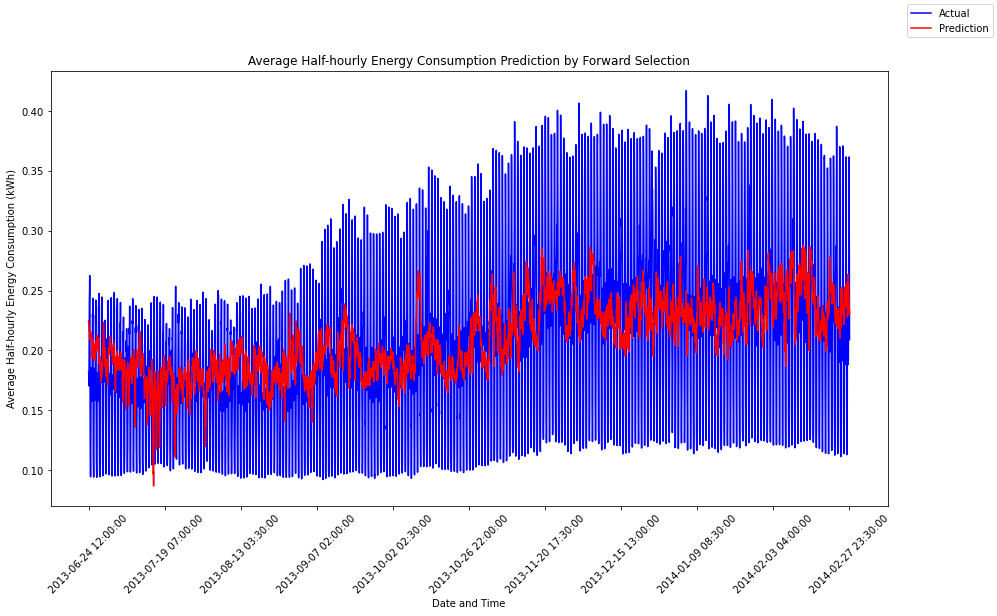

In [104]:
start = time.time()

forward_selected_predictors = []
remaining_predictors = list(range(len(X_H.columns)))
forward_mse = 10000

while len(remaining_predictors):
    mse_list = []
    
    #Loop through each remaining predictors
    for predictors in remaining_predictors:
        #Get current X based on the predictors
        current_predictors = forward_selected_predictors.copy()
        current_predictors.append(predictors)
        X_current = X_train.iloc[:, current_predictors]
        
        #Create model
        model = LinearRegression()
        
        #Evaluate model and append to MSE list
        score = -1*cross_val_score(model, X_current, Y_train, cv=kf_5_repeated, \
           scoring='neg_mean_squared_error').mean()
        mse_list.append(score)
        
    #Select the remaining predictor which yields the lowest MSE
    mse_min, index = min(mse_list), mse_list.index(min(mse_list))
    
    #Check if need to add that predictor
    if mse_min < forward_mse:
        forward_mse = mse_min
        new_predictor = remaining_predictors.pop(index)
        forward_selected_predictors.append(new_predictor)
        print(forward_selected_predictors, mse_min)
        
    #Break the loop if the score can no longer improve
    elif mse_min >= forward_mse:
        break
        
#Print the intermediate results
forward_selected_predictors.sort()
forward_selected_predictors_names = [X_attr[i] for i in forward_selected_predictors]
print('The sorted indices of selected predictors are:', forward_selected_predictors)
print('The selected predictors are:' , forward_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_forward_train_final = X_train.iloc[:, forward_selected_predictors]
X_forward_test_final = X_test.iloc[:, forward_selected_predictors]
best_forward_model, best_forward_y_pred, best_forward_test_mse = \
    mse_linear_reg(X_forward_train_final, Y_train, X_forward_test_final, Y_test)
print('Test MSE: ', best_forward_test_mse)

#Check time used to run the code
end = time.time()
forward_time = end-start
print('Executed time in seconds:', forward_time)

#Generate graph
plot_graph(Y_test, best_forward_y_pred, 'Forward Selection')

#### Backward selection

[0, 2, 3, 4, 5, 6, 7] 0.005045224116446616
The indices of remaining predictors are: [0, 2, 3, 4, 5, 6, 7]
The remaining predictors are: ['temperatureMax', 'dewPoint', 'windSpeed', 'cloudCover', 'pressure', 'visibility', 'humidity']
Test MSE:  0.004674120138817211
Executed time: 5.208242177963257


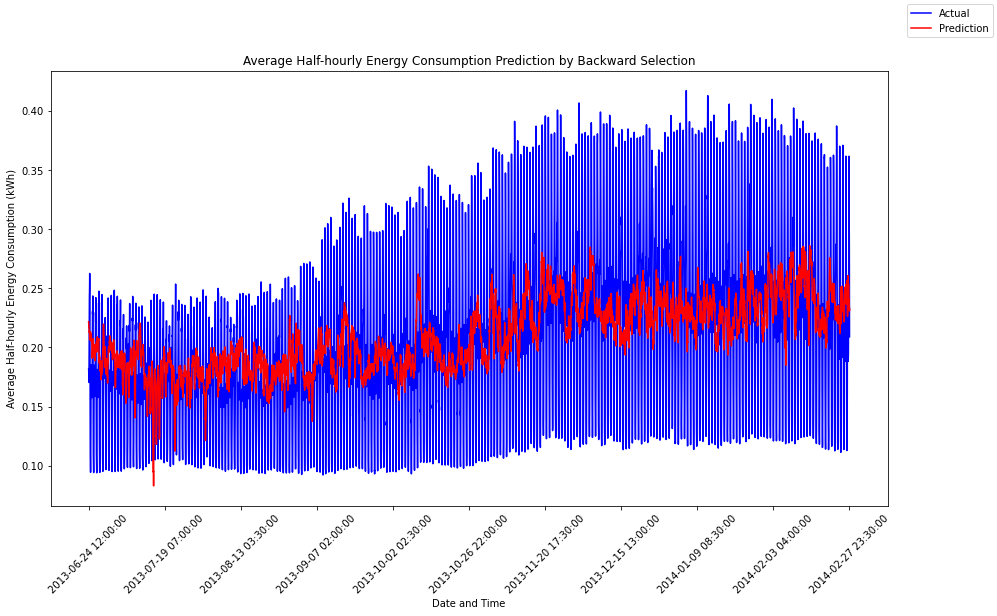

In [105]:
start = time.time()

backward_selected_predictors = list(range(len(X_H.columns)))
model = LinearRegression()
backward_mse = -1*cross_val_score(model, X, Y, cv=kf_5, \
           scoring='neg_mean_squared_error').mean()

while len(backward_selected_predictors):
    mse_list = []
    
    #Loop through each remaining predictors
    for predictors in backward_selected_predictors:
        #Get current X based on the predictors
        current_predictors = backward_selected_predictors.copy()
        current_predictors.remove(predictors)
        X_current = X_train.iloc[:, current_predictors]
        
        #Create model
        model = LinearRegression()
        
        #Evaluate model and append to MSE list
        score = -1*cross_val_score(model, X_current, Y_train, cv=kf_5_repeated, \
           scoring='neg_mean_squared_error').mean()
        mse_list.append(score)
        
    #Select the remaining predictor which yields the lowest MSE
    mse_min, index = min(mse_list), mse_list.index(min(mse_list))
    
    #Check if need to add that predictor
    if mse_min < backward_mse:
        backward_mse = mse_min
        deleted_predictor = backward_selected_predictors[index]
        backward_selected_predictors.remove(deleted_predictor)
        print(backward_selected_predictors, backward_mse)
        
    #Break the loop if the score can no longer improve
    elif mse_min >= backward_mse:
        break
        
#Print the results
backward_selected_predictors_names = [X_attr[i] for i in backward_selected_predictors]
print('The indices of remaining predictors are:', backward_selected_predictors)
print('The remaining predictors are:' , backward_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_backward_train_final = X_train.iloc[:, backward_selected_predictors]
X_backward_test_final = X_test.iloc[:, backward_selected_predictors]
best_backward_model, best_backward_y_pred, best_backward_test_mse = \
    mse_linear_reg(X_backward_train_final, Y_train, X_backward_test_final, Y_test)
print('Test MSE: ', best_backward_test_mse)

#Check time used to run the code
end = time.time()
backward_time = end-start
print('Executed time:', backward_time)

#Generate graph
plot_graph(Y_test, best_backward_y_pred, 'Backward Selection')

### Best subset selection

(0,) 0.0056154807869192224
(1,) 0.005615207193423188
(2,) 0.005042491988162855
(3,) 0.004787078724925702
(4,) 0.005730227007265339
(5,) 0.004991521029437847
(6,) 0.0054151232628512035
(7,) 0.00560597187467105
(0, 1) 0.005614723370917492
(0, 2) 0.004991656982186945
(0, 3) 0.004786946290559341
(0, 4) 0.0057309349100349285
(0, 5) 0.004953186129984021
(0, 6) 0.005417734133092945
(0, 7) 0.005613640749936152
(1, 2) 0.005048606434762173
(1, 3) 0.004800590317548916
(1, 4) 0.005729159322220844
(1, 5) 0.005000765118181172
(1, 6) 0.005412931166233891
(1, 7) 0.005606246910522205
(2, 3) 0.004794153992131407
(2, 4) 0.0050876119375847075
(2, 5) 0.004958201678601767
(2, 6) 0.004876263810788598
(2, 7) 0.004752703485858897
(3, 4) 0.004786374935913428
(3, 5) 0.004809247747253628
(3, 6) 0.00466055122005886
(3, 7) 0.004786822451472947
(4, 5) 0.005036600070526249
(4, 6) 0.005518710421657418
(4, 7) 0.005702756368136224
(5, 6) 0.004860007422857247
(5, 7) 0.004743893953857194
(6, 7) 0.005420431280808038
(0, 1,

(0, 1, 2, 3, 4, 6, 7) 0.0046823817901150535
(0, 1, 2, 3, 5, 6, 7) 0.004688954231034359
(0, 1, 2, 4, 5, 6, 7) 0.004705592207148588
(0, 1, 3, 4, 5, 6, 7) 0.004722050711318695
(0, 2, 3, 4, 5, 6, 7) 0.004674120138817211
(1, 2, 3, 4, 5, 6, 7) 0.0047008443296787175
(0, 1, 2, 3, 4, 5, 6, 7) 0.004700214125583498
The indices of remaining predictors are: [0, 2, 6, 7]
The remaining predictors are: ['temperatureMax', 'dewPoint', 'visibility', 'humidity']
Test MSE:  0.004647122111767706
Executed time: 2.660799503326416


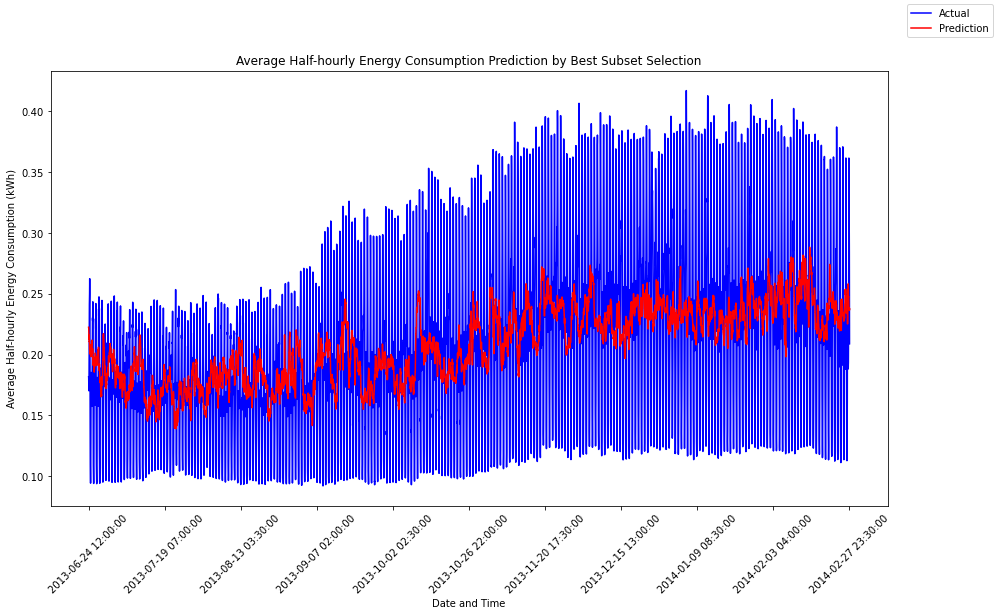

In [106]:
start = time.time()

mse_list = []
predictors_list = []

#Iterate from k = 1 to number of attributes in X
for k in range(1, len(X_H.columns)+1):
    
    #Iterate all the combinations of picking k predictors from X
    for predictors in itertools.combinations(range(len(X_H.columns)), k):
        X_train_current = X_train.iloc[:, list(predictors)]
        X_test_current = X_test.iloc[:, list(predictors)]
        
        #Create model
        _, _, output_mse = mse_linear_reg(X_train_current, Y_train, X_test_current, Y_test)
        mse_list.append(output_mse)
        predictors_list.append(predictors)
        print(predictors, output_mse)

#Print the results
subset_mse_min = min(mse_list)
subset_selected_predictors = list(predictors_list[mse_list.index(subset_mse_min)])
subset_selected_predictors_names = [X_attr[i] for i in subset_selected_predictors]
print('The indices of remaining predictors are:', subset_selected_predictors)
print('The remaining predictors are:' , subset_selected_predictors_names)

#Fit the selected predictors into new model and get test MSE
X_subset_train_final = X_train.iloc[:, subset_selected_predictors]
X_subset_test_final = X_test.iloc[:, subset_selected_predictors]
best_subset_model, best_subset_y_pred, best_subset_test_mse = \
    mse_linear_reg(X_subset_train_final, Y_train, X_subset_test_final, Y_test)
print('Test MSE: ', best_subset_test_mse)

#Check time used to run the code
end = time.time()
best_subset_time = end-start
print('Executed time:', best_subset_time)

#Generate graph
plot_graph(Y_test, best_subset_y_pred, 'Best Subset Selection')

#### Lasso Regression

Best alpha: 0.01
Coefficients: [ 0.          0.         -0.         -0.01638789  0.         -0.00158743
  0.         -0.        ]
Test MSE: 0.004895041254048972
Executed time: 3.0894992351531982


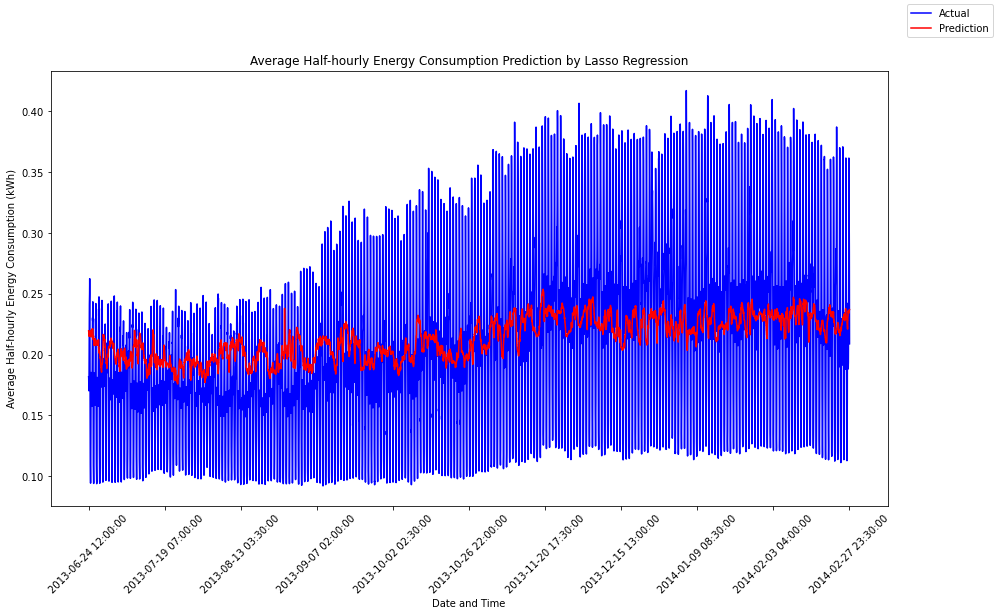

In [107]:
start = time.time()

#LASSO with lambda chosen by cross-validation (default 5-fold cross-validation)
alpha_list = np.linspace(0.01, 50, 1000)
lasso_model = LassoCV(alphas=alpha_list, random_state=1)
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mse(Y_test, lasso_pred)
print('Best alpha:', lasso_model.alpha_)
print('Coefficients:', lasso_model.coef_)
print('Test MSE:', lasso_mse)

#Check time used to run the code
end = time.time()
lasso_time = end-start
print('Executed time:', lasso_time)

#Generate graph
plot_graph(Y_test, lasso_pred, 'Lasso Regression')

#### Ridge regression

Best alpha: 0.41032032032032034
MSE: 0.004700028842379711
Executed time: 3.3894107341766357


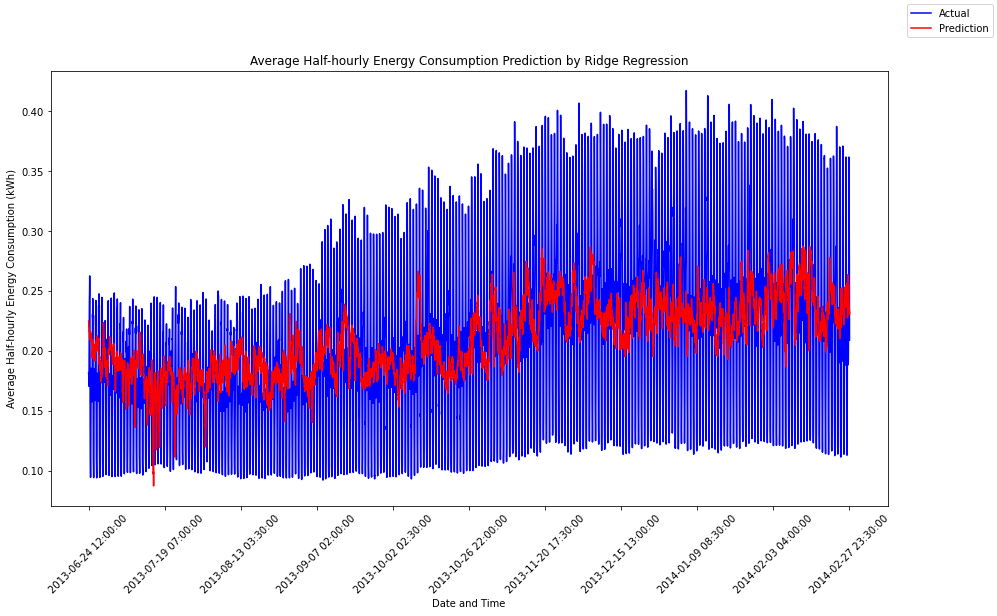

In [108]:
start = time.time()

#Ridge train_test version
alpha_list = np.linspace(0.01, 50, 1000)
ridge_model = RidgeCV(alphas=alpha_list)
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mse(Y_test, ridge_pred)
print('Best alpha:', ridge_model.alpha_)
print('MSE:', ridge_mse)

#Check time used to run the code
end = time.time()
ridge_time = end-start
print('Executed time:', ridge_time)

#Generate graph
plot_graph(Y_test, ridge_pred, 'Ridge Regression')

### KNN

In [109]:
def knn_regression(x_train, y_train, x_test, y_test, k):
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    output_mse = mse(y_test, pred)
    return model, pred, output_mse

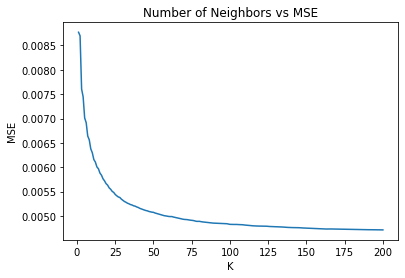

Best K: 198
Test MSE: 0.0047122309792478785
Executed time: 265.49966049194336


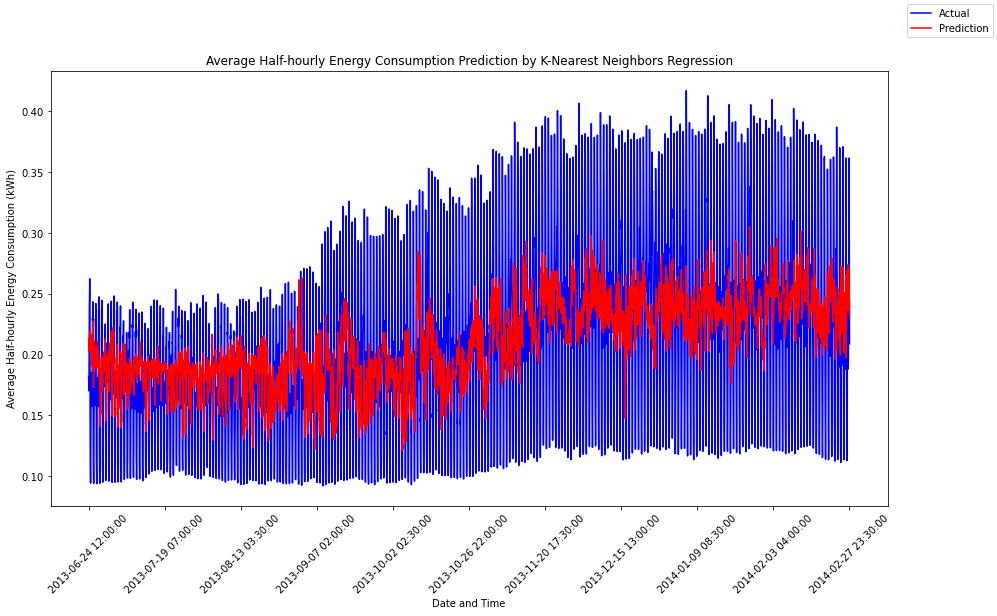

In [110]:
start = time.time()

#Try K from 1 to 200
mse_list = []
k_range = range(1,201)
for K in k_range:
    _, _, model_mse = knn_regression(X_train, Y_train, X_test, Y_test, K)
    mse_list.append(model_mse)
plt.plot(k_range, mse_list)
plt.title("Number of Neighbors vs MSE")
plt.xlabel("K")
plt.ylabel("MSE")
plt.savefig('./models/k_vs_mse_H.png', facecolor='w', bbox_inches='tight') 
plt.show()

#Pick best K value and fit into model
best_k = mse_list.index(min(mse_list))
best_knn_model, best_knn_y_pred, best_knn_mse = knn_regression(X_train, Y_train, X_test, Y_test, best_k)

#Print results
print('Best K:', best_k)
print('Test MSE:', best_knn_mse)

#Check time used to run the code
end = time.time()
knn_time = end-start
print('Executed time:', knn_time)

#Plot graph
plot_graph(Y_test, best_knn_y_pred, 'K-Nearest Neighbors Regression')

#### Conclusion

In [111]:
model_data_H = {'Forward Selection':  [forward_selected_predictors, forward_selected_predictors_names, 'N/A', best_forward_test_mse, forward_time],
        'Backward Selection': [backward_selected_predictors, backward_selected_predictors_names, 'N/A', best_backward_test_mse, backward_time],
        'Best Subset Selection': [subset_selected_predictors, subset_selected_predictors_names, 'N/A', best_subset_test_mse, best_subset_time],
        'Lasso Regression': ['N/A', 'N/A', 'Alpha: ' + str(lasso_model.alpha_), lasso_mse, lasso_time],
        'Ridge Regression': ['N/A', 'N/A', 'Alpha: ' + str(ridge_model.alpha_), ridge_mse, ridge_time],
        'KNN Regression': ['N/A', 'N/A', 'K: ' + str(best_k), best_knn_mse, knn_time]
        }

model_data_H_df = pd.DataFrame(model_data_H, index=['Predictors Index', 'Predictors Names', 'Best Parameters', 'MSE', 'Execution Time'])

In [112]:
model_data_H_df

,Forward Selection,Backward Selection,Best Subset Selection,Lasso Regression,Ridge Regression,KNN Regression
Predictors Index,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 2, 3, 4, 5, 6, 7]","[0, 2, 6, 7]",N/A,N/A,N/A
Predictors Names,"[temperatureMax, windBearing, dewPoint, windSp...","[temperatureMax, dewPoint, windSpeed, cloudCov...","[temperatureMax, dewPoint, visibility, humidity]",N/A,N/A,N/A
Best Parameters,N/A,N/A,N/A,Alpha: 0.01,Alpha: 0.41032032032032034,K: 198
MSE,0.0047,0.004674,0.004647,0.004895,0.0047,0.004712
Execution Time,9.356837,5.208242,2.6608,3.089499,3.389411,265.49966


In [113]:
#Save the above table as png
import dataframe_image as dfi
dfi.export(model_data_H_df, './models/results_H.png')